*******************************************************************************************************
*******************************************************************************************************
# PROJECT (code)

**A comparison and application of machine learning techniques towards the analysis of UCI's breast cancer prediction dataset.**

In [1]:
# Python libraries for data pre-processing
import pandas as pd
import numpy as np

# Python libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df2 = pd.read_csv('BreastCancer.csv')

# Data Preprocessing

In [3]:
df2.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df2["Class"].replace((2,4),(0,1),inplace=True)
df2["Class"].head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: int64>

In [5]:
df2.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
# Checking for Missing Values MV: 
df2.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
# Checking for duplicated rows
duplicates = df2[df2.duplicated()]
print("Number of duplicate rows :: ", duplicates.shape)

Number of duplicate rows ::  (8, 11)


In [9]:
# Droping the duplicated row and printing number of duplicate rows after a recheck
df2 = df2.drop_duplicates()
print("Number of duplicate rows :: ", df2[df2.duplicated()].shape)

Number of duplicate rows ::  (0, 11)


In [10]:
df2.shape

(675, 11)

# Exploratory Data Analysis (EDA)

In [11]:
# Converting categorical attributes to text for better data exploratory and visualization

df2['Class'][df2['Class'] == 0] = 'benign'
df2['Class'][df2['Class'] == 1] = 'malignant'

In [12]:
df2['Class'].value_counts()

benign       439
malignant    236
Name: Class, dtype: int64

In [13]:
df2['Clump Thickness'].value_counts()

1     136
5     127
3     102
4      79
10     69
2      50
8      44
6      32
7      23
9      13
Name: Clump Thickness, dtype: int64

In [14]:
df2['Uniformity of Cell Size'].value_counts()

1     368
10     65
3      51
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64

In [15]:
df2['Uniformity of Cell Shape'].value_counts()

1     341
2      58
10     56
3      53
4      43
5      31
7      30
6      29
8      27
9       7
Name: Uniformity of Cell Shape, dtype: int64

In [16]:
df2['Marginal Adhesion'].value_counts()

1     387
3      58
2      56
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: Marginal Adhesion, dtype: int64

In [17]:
df2['Single Epithelial Cell Size'].value_counts()

2     373
3      70
4      48
1      42
6      40
5      39
10     30
8      20
7      11
9       2
Name: Single Epithelial Cell Size, dtype: int64

In [18]:
df2['Bare Nuclei'].value_counts()

1     397
10    130
2      30
5      30
3      28
8      20
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [19]:
df2['Bland Chromatin'].value_counts()

2     159
3     157
1     149
7      69
4      39
5      34
8      28
10     20
9      11
6       9
Name: Bland Chromatin, dtype: int64

In [20]:
df2['Normal Nucleoli'].value_counts()

1     426
10     60
3      40
2      36
8      23
6      22
5      19
4      18
7      16
9      15
Name: Normal Nucleoli, dtype: int64

In [21]:
df2['Mitoses'].value_counts()

1     556
2      35
3      32
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [22]:
#droping code number column
df2 = df2.drop(['Sample code number'], axis=1) 

In [23]:
df2.shape

(675, 10)

# Analysis of Attributes

In [24]:
#A discription of numberical attributes
df2.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407
std,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


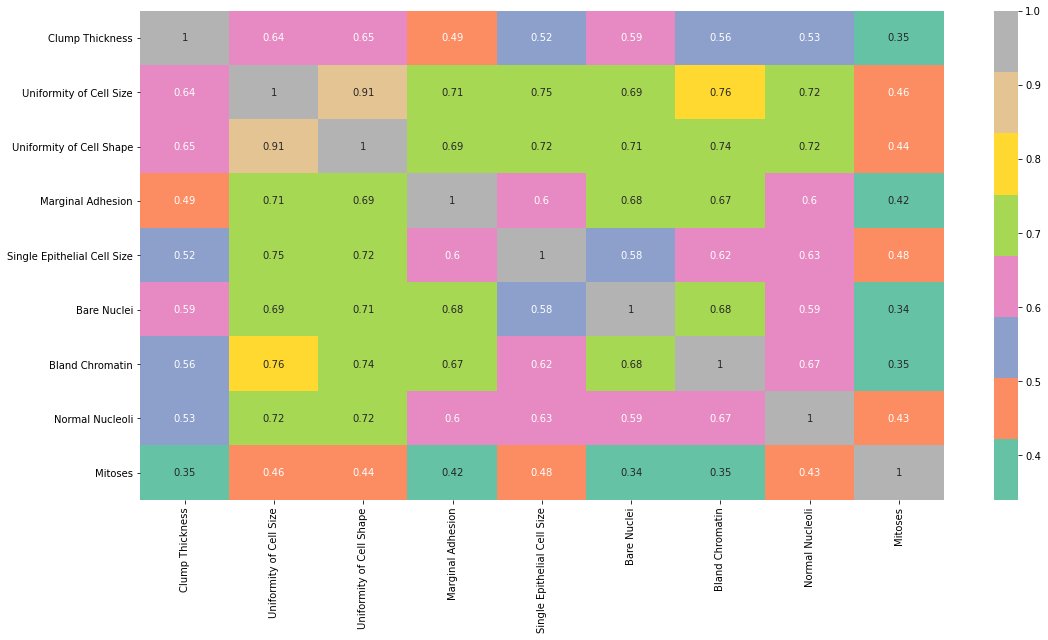

In [25]:
# A correletional heatmap of numberical attributes
plt.figure(figsize=(18,9))
sns.heatmap(df2.corr(), annot=True, cmap='Set2', )
plt.show()

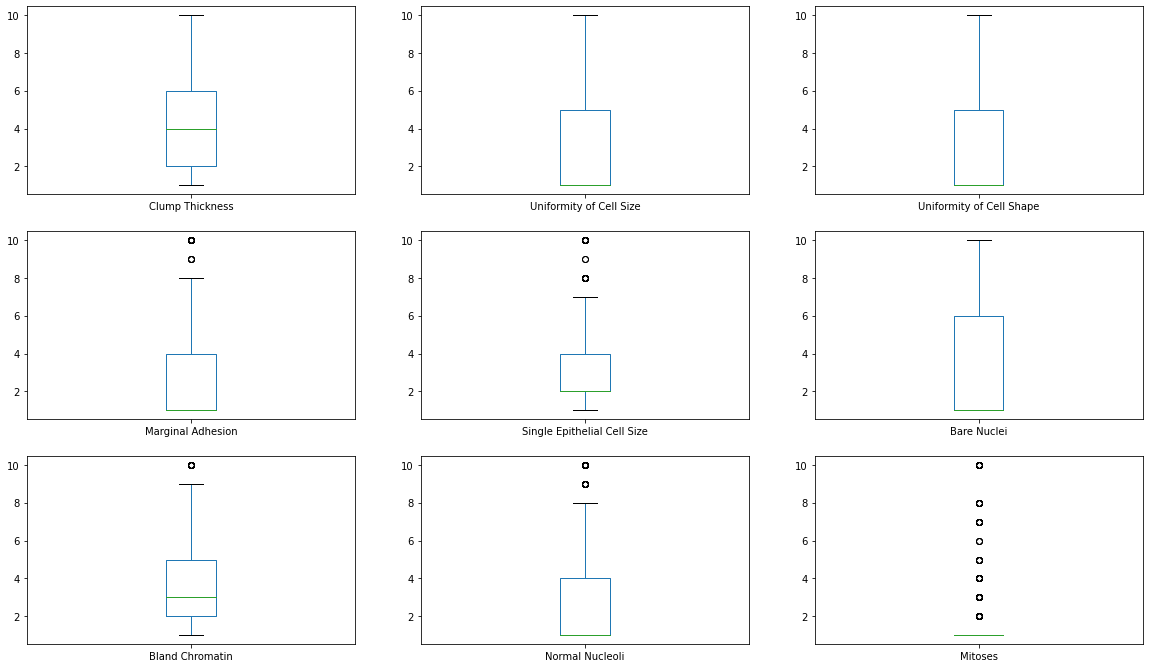

In [26]:
# box and whiskers plot
df2.plot(kind='box', subplots=True, layout=(5,3), figsize=(20,20))
plt.show()

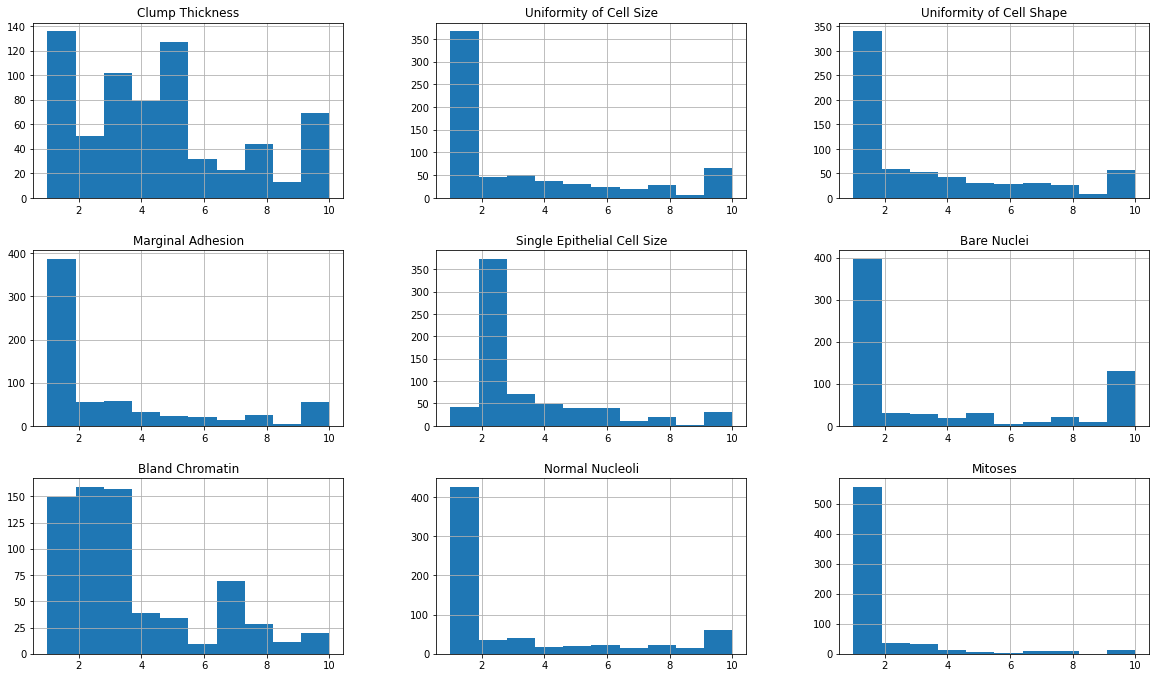

In [27]:
df2.hist(figsize=(20,20), layout=(5,3));

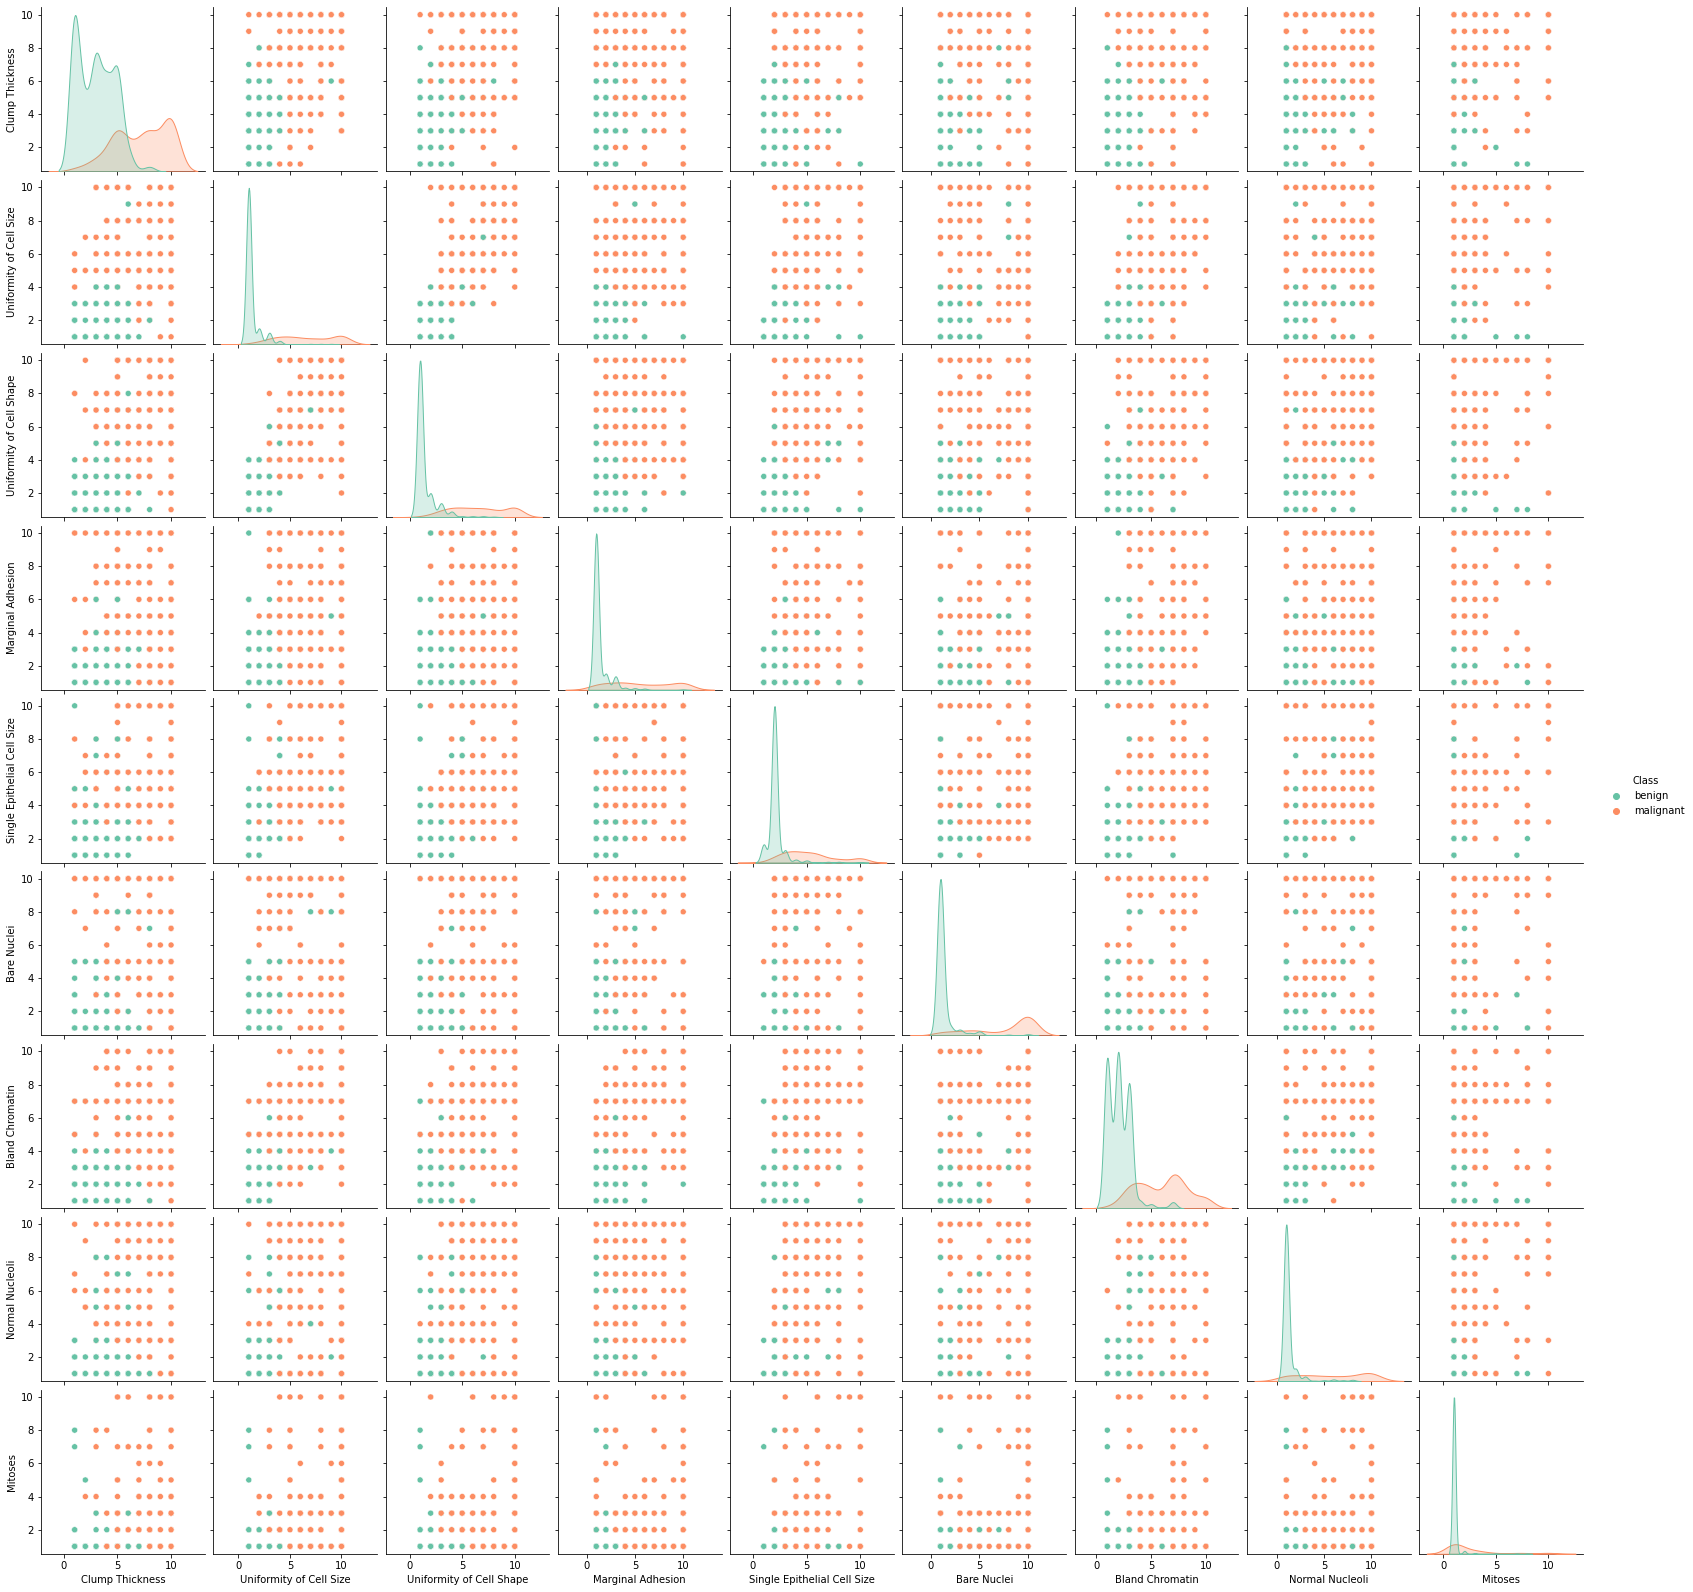

In [28]:
sns.pairplot(df2, hue = 'Class', palette='Set2', vars = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'])
plt.show()

In [29]:
# summary statistics of categorical attributes
df2.describe(include =[np.object])

,Class
count,675
unique,2
top,benign
freq,439


**Review of Breast Cancer Class Distribution**

In [30]:
df2.groupby('Class').size()

Class
benign       439
malignant    236
dtype: int64

In [31]:
# Grouping patients with malignant and benign cancer into two dinstinct dataframes for use in visualization below
Class1=df2[df2['Class']=='malignant']
Class0=df2[df2['Class']=='benign']

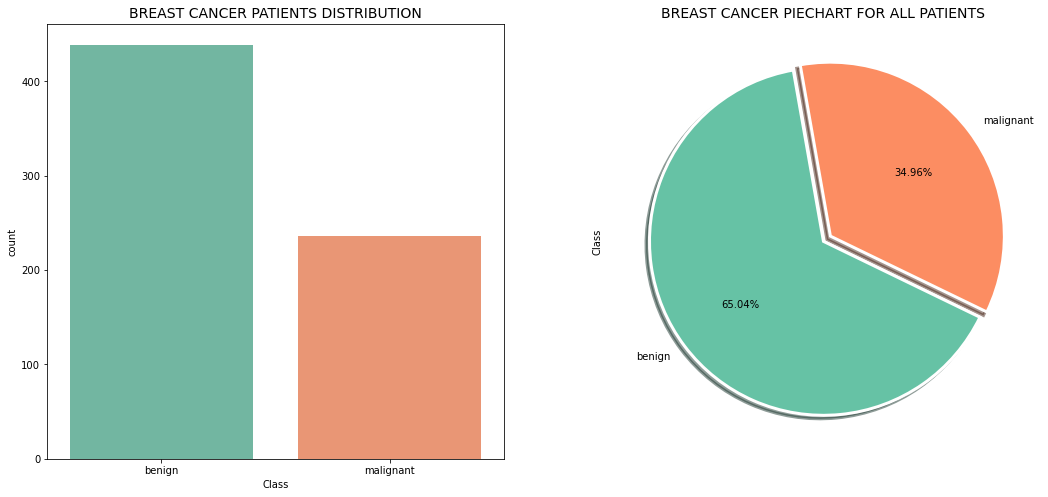

In [32]:
# plotting patients with 'malignant' or 'benign' breast cancer for the entire distribution

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Class'], palette='Set2')
plt.title('BREAST CANCER PATIENTS DISTRIBUTION', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Class"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2",5),startangle = 100,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.1/2], shadow=True)
plt.title("BREAST CANCER PIECHART FOR ALL PATIENTS", fontsize=14, weight='light' )
plt.show()

**Review of Clump Thickness Distribution**

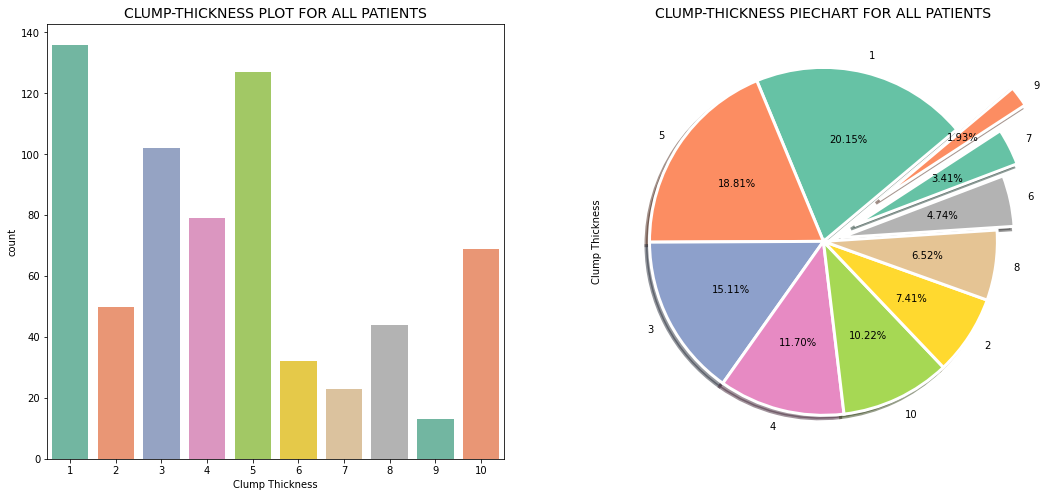

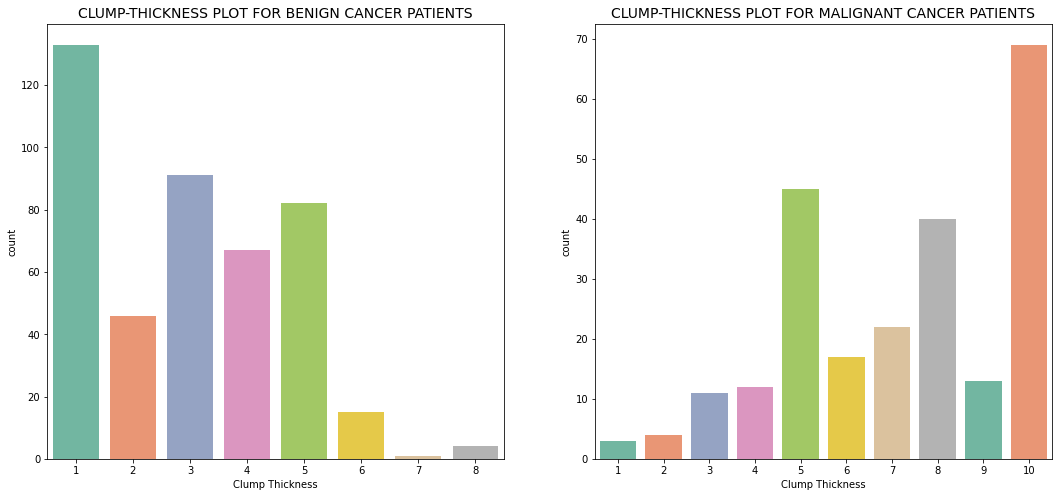

In [33]:
# plotting 'Clump Thickness' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Clump Thickness'], palette='Set2')
plt.title('CLUMP-THICKNESS PLOT FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Clump Thickness"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2"),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.0,.0,.0,.0,.0,.1,.2,.4,], shadow=True)
plt.title('CLUMP-THICKNESS PIECHART FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for benign patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Class0['Clump Thickness'], palette='Set2')
plt.title('CLUMP-THICKNESS PLOT FOR BENIGN CANCER PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for malignant patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Class1['Clump Thickness'], palette='Set2')
plt.title('CLUMP-THICKNESS PLOT FOR MALIGNANT CANCER PATIENTS', fontsize=14, weight='light' )
plt.show()

In [34]:
# Distribution of patients based on Clump Thickness
plot_criteria= ['Clump Thickness', 'Class']
cm = sns.light_palette("lightblue", as_cmap=True)
(round(pd.crosstab(df2[plot_criteria[0]], df2[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,benign,malignant
Clump Thickness,,
1,30.300000,1.270000
2,10.480000,1.690000
3,20.730000,4.660000
4,15.260000,5.080000
5,18.680000,19.070000
6,3.420000,7.200000
7,0.230000,9.320000
8,0.910000,16.950000
9,0.000000,5.510000


**Distribution of Uniformity of Cell Size**

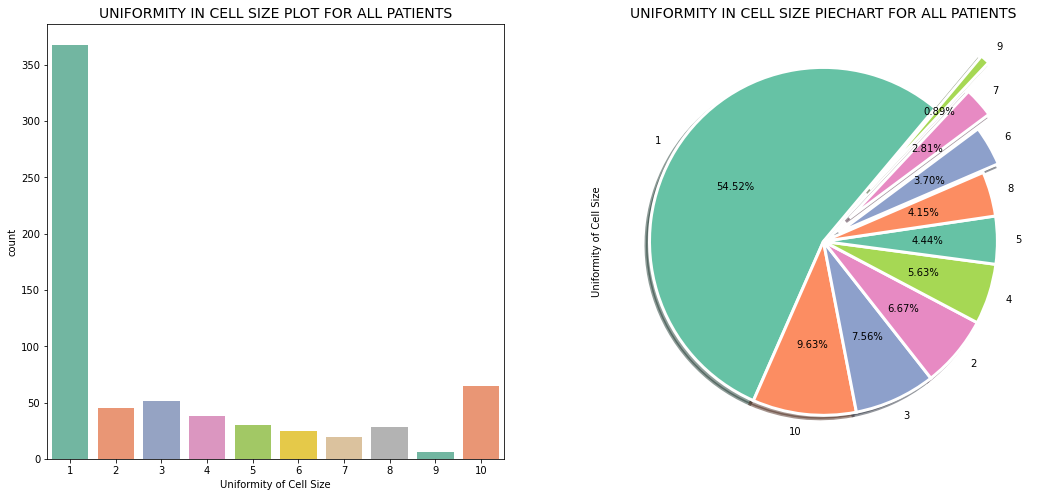

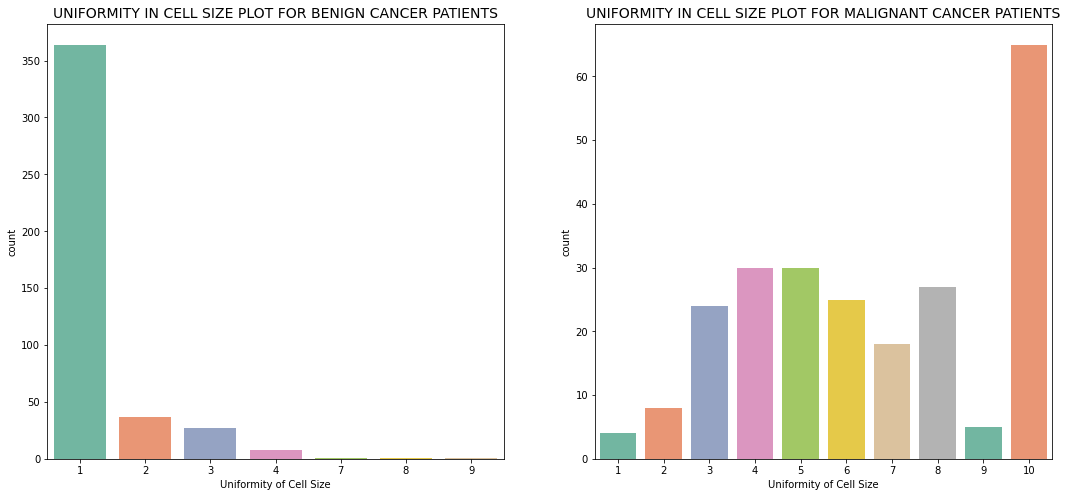

In [35]:
# plotting 'Uniformity of Cell Size' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Uniformity of Cell Size'], palette='Set2')
plt.title('UNIFORMITY IN CELL SIZE PLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Uniformity of Cell Size"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2",5),startangle = 50,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.0,.0,.0,.0,.0,.1,.2,.4,], shadow=True)
plt.title('UNIFORMITY IN CELL SIZE PIECHART FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for benign patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Class0['Uniformity of Cell Size'], palette='Set2')
plt.title('UNIFORMITY IN CELL SIZE PLOT FOR BENIGN CANCER PATIENTS', fontsize=14, weight='light')

# plotting 'Clump Thickness' distribution for malignant patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Class1['Uniformity of Cell Size'], palette='Set2')
plt.title('UNIFORMITY IN CELL SIZE PLOT FOR MALIGNANT CANCER PATIENTS', fontsize=14, weight='light' )
plt.show()

In [36]:
# Distribution of patients based on Uniformity of Cell Size
plot_criteria= ['Uniformity of Cell Size', 'Class']
cm = sns.light_palette("lightblue", as_cmap=True)
(round(pd.crosstab(df2[plot_criteria[0]], df2[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,benign,malignant
Uniformity of Cell Size,,
1,82.920000,1.690000
2,8.430000,3.390000
3,6.150000,10.170000
4,1.820000,12.710000
5,0.000000,12.710000
6,0.000000,10.590000
7,0.230000,7.630000
8,0.230000,11.440000
9,0.230000,2.120000


**Distribution of Uniformity of Cell Shape**

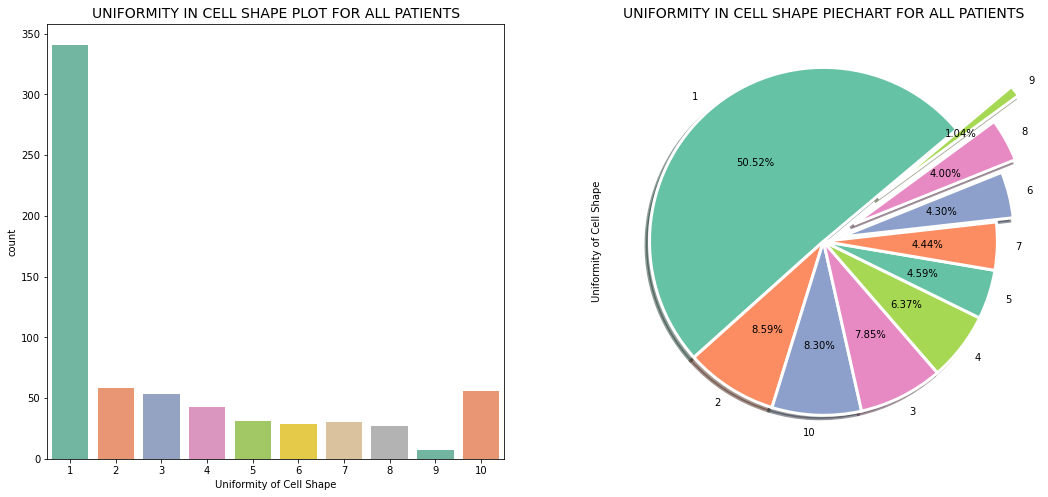

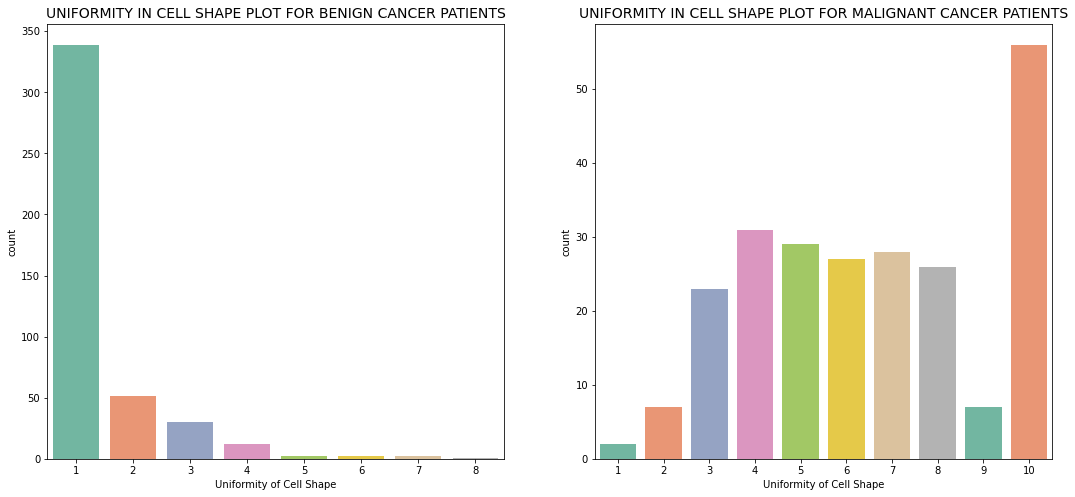

In [37]:
# plotting 'CUniformity of Cell Shape' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Uniformity of Cell Shape'], palette='Set2')
plt.title('UNIFORMITY IN CELL SHAPE PLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Uniformity of Cell Shape"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2",5),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.0,.0,.0,.0,.0,.1,.2,.4,], shadow=True)
plt.title('UNIFORMITY IN CELL SHAPE PIECHART FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for benign patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Class0['Uniformity of Cell Shape'], palette='Set2')
plt.title('UNIFORMITY IN CELL SHAPE PLOT FOR BENIGN CANCER PATIENTS', fontsize=14, weight='light')

# plotting 'Clump Thickness' distribution for malignant patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Class1['Uniformity of Cell Shape'], palette='Set2')
plt.title('UNIFORMITY IN CELL SHAPE PLOT FOR MALIGNANT CANCER PATIENTS', fontsize=14, weight='light' )
plt.show()

In [38]:
# Distribution of patients based on Uniformity of Cell Shape
plot_criteria= ['Uniformity of Cell Shape', 'Class']
cm = sns.light_palette("lightblue", as_cmap=True)
(round(pd.crosstab(df2[plot_criteria[0]], df2[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,benign,malignant
Uniformity of Cell Shape,,
1,77.220000,0.850000
2,11.620000,2.970000
3,6.830000,9.750000
4,2.730000,13.140000
5,0.460000,12.290000
6,0.460000,11.440000
7,0.460000,11.860000
8,0.230000,11.020000
9,0.000000,2.970000


**Distribution of Marginal Adhesion**

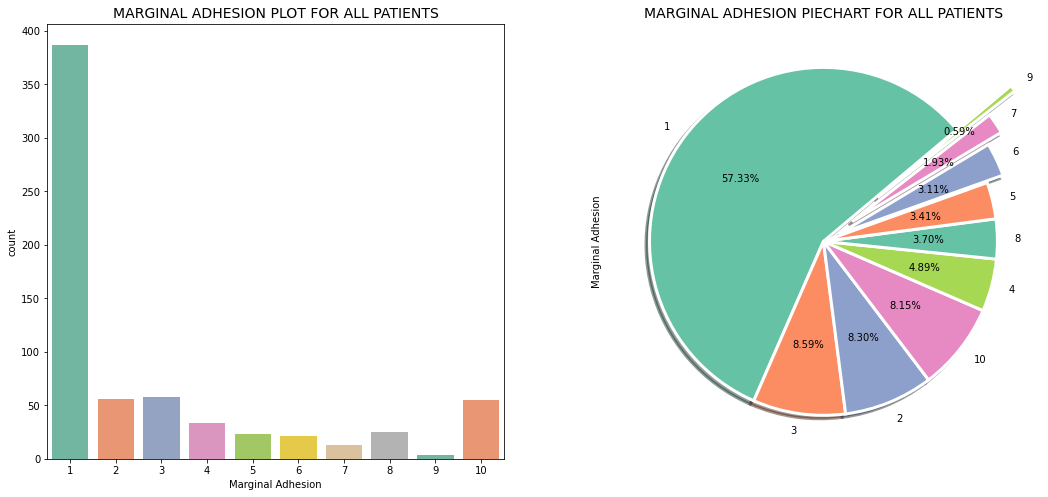

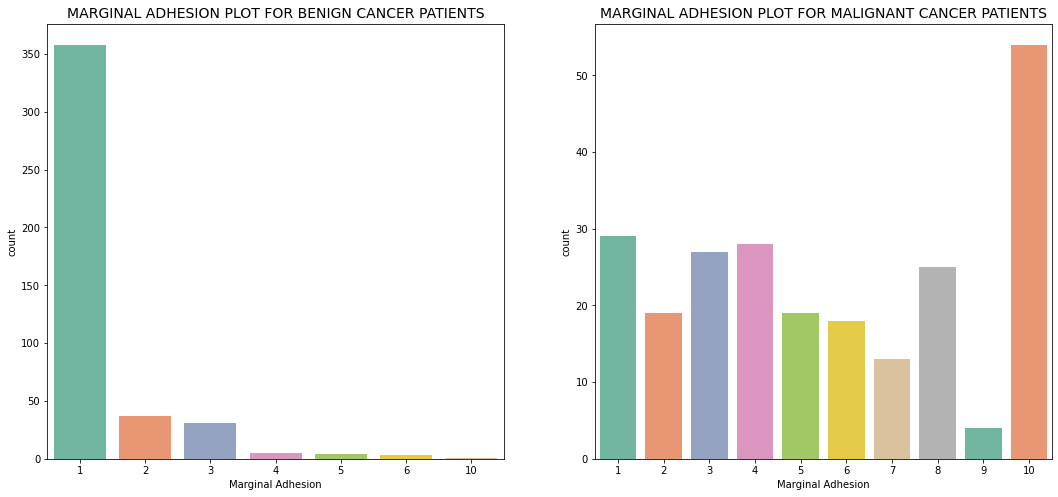

In [39]:
# plotting 'Marginal Adhesion' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Marginal Adhesion'], palette='Set2')
plt.title('MARGINAL ADHESION PLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Marginal Adhesion"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2",5),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.0,.0,.0,.0,.0,.1,.2,.4,], shadow=True)
plt.title('MARGINAL ADHESION PIECHART FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for benign patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Class0['Marginal Adhesion'], palette='Set2')
plt.title('MARGINAL ADHESION PLOT FOR BENIGN CANCER PATIENTS', fontsize=14, weight='light')

# plotting 'Clump Thickness' distribution for malignant patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Class1['Marginal Adhesion'], palette='Set2')
plt.title('MARGINAL ADHESION PLOT FOR MALIGNANT CANCER PATIENTS', fontsize=14, weight='light' )
plt.show()

In [40]:
# Distribution of patients based on Marginal Adhesion
plot_criteria= ['Marginal Adhesion', 'Class']
cm = sns.light_palette("lightblue", as_cmap=True)
(round(pd.crosstab(df2[plot_criteria[0]], df2[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Class,benign,malignant
Marginal Adhesion,,
1,81.550000,12.290000
2,8.430000,8.050000
3,7.060000,11.440000
4,1.140000,11.860000
5,0.910000,8.050000
6,0.680000,7.630000
7,0.000000,5.510000
8,0.000000,10.590000
9,0.000000,1.690000


**Distribution of Single Epithelial Cell Size**

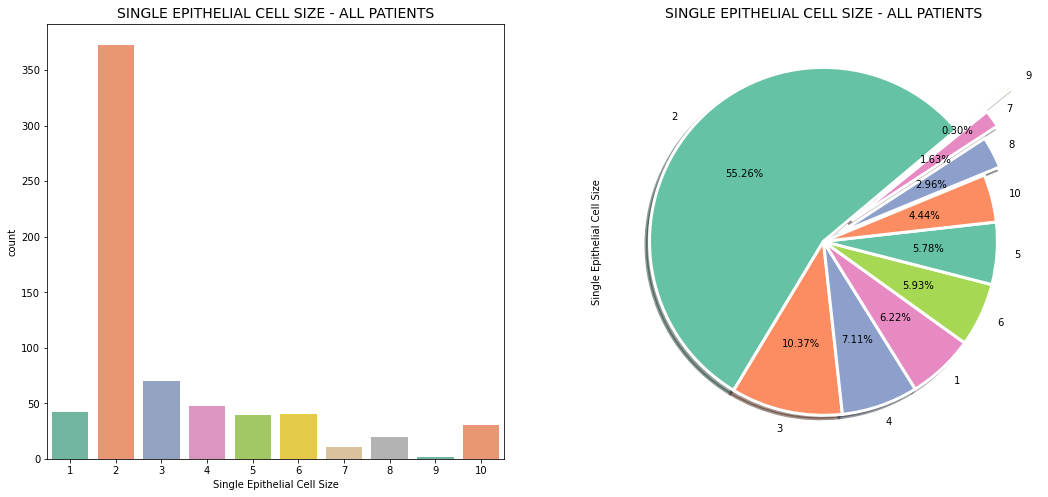

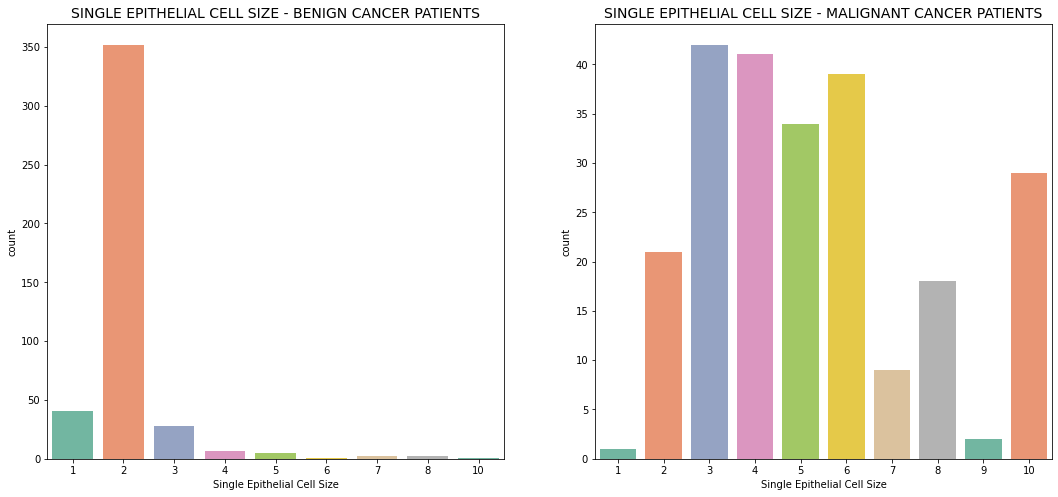

In [41]:
# plotting 'Single Epithelial Cell Size' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Single Epithelial Cell Size'], palette='Set2')
plt.title('SINGLE EPITHELIAL CELL SIZE - ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Single Epithelial Cell Size"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2",5),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.0,.0,.0,.0,.0,.1,.2,.4,], shadow=True)
plt.title('SINGLE EPITHELIAL CELL SIZE - ALL PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for benign patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Class0['Single Epithelial Cell Size'], palette='Set2')
plt.title('SINGLE EPITHELIAL CELL SIZE - BENIGN CANCER PATIENTS', fontsize=14, weight='light')

# plotting 'Clump Thickness' distribution for malignant patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Class1['Single Epithelial Cell Size'], palette='Set2')
plt.title('SINGLE EPITHELIAL CELL SIZE - MALIGNANT CANCER PATIENTS', fontsize=14, weight='light' )
plt.show()

In [42]:
# Distribution of patients based on Single Epithelial Cell Size
plot_criteria= ['Single Epithelial Cell Size', 'Class']
cm = sns.light_palette("lightblue", as_cmap=True)
(round(pd.crosstab(df2[plot_criteria[0]], df2[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

Class,benign,malignant
Single Epithelial Cell Size,,
1,9.340000,0.420000
2,80.180000,8.900000
3,6.380000,17.800000
4,1.590000,17.370000
5,1.140000,14.410000
6,0.230000,16.530000
7,0.460000,3.810000
8,0.460000,7.630000
9,0.000000,0.850000


**Distribution of Bare Nuclei**

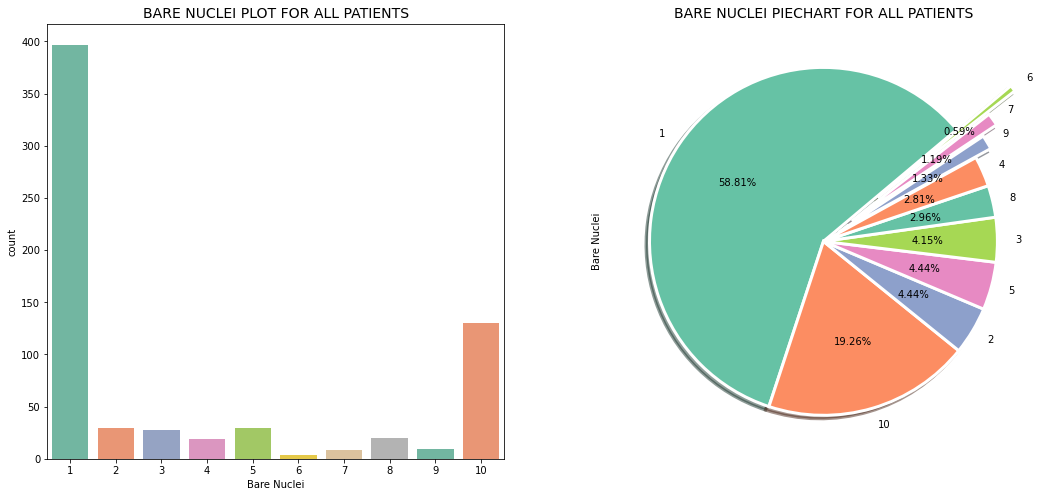

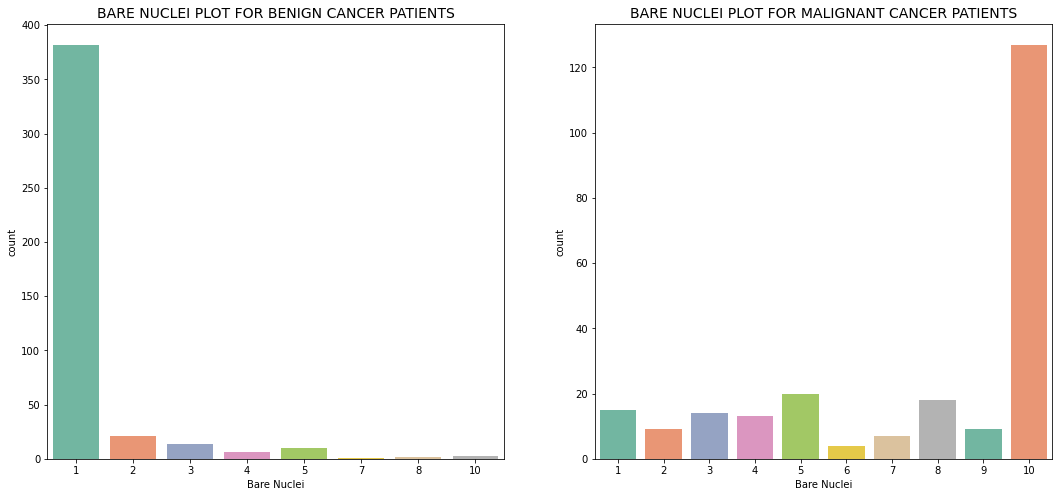

In [43]:
# plotting ' Bare Nuclei' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Bare Nuclei'], palette='Set2')
plt.title('BARE NUCLEI PLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Bare Nuclei"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2",5),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.0,.0,.0,.0,.0,.1,.2,.4,], shadow=True)
plt.title('BARE NUCLEI PIECHART FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for benign patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Class0['Bare Nuclei'], palette='Set2')
plt.title('BARE NUCLEI PLOT FOR BENIGN CANCER PATIENTS', fontsize=14, weight='light')

# plotting 'Clump Thickness' distribution for malignant patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Class1['Bare Nuclei'], palette='Set2')
plt.title('BARE NUCLEI PLOT FOR MALIGNANT CANCER PATIENTS', fontsize=14, weight='light' )
plt.show()

In [44]:
# Distribution of patients based on  Bare Nuclei
plot_criteria= ['Bare Nuclei', 'Class']
cm = sns.light_palette("lightblue", as_cmap=True)
(round(pd.crosstab(df2[plot_criteria[0]], df2[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

Class,benign,malignant
Bare Nuclei,,
1,87.020000,6.360000
2,4.780000,3.810000
3,3.190000,5.930000
4,1.370000,5.510000
5,2.280000,8.470000
6,0.000000,1.690000
7,0.230000,2.970000
8,0.460000,7.630000
9,0.000000,3.810000


**Distribution of Bland Chromatin**

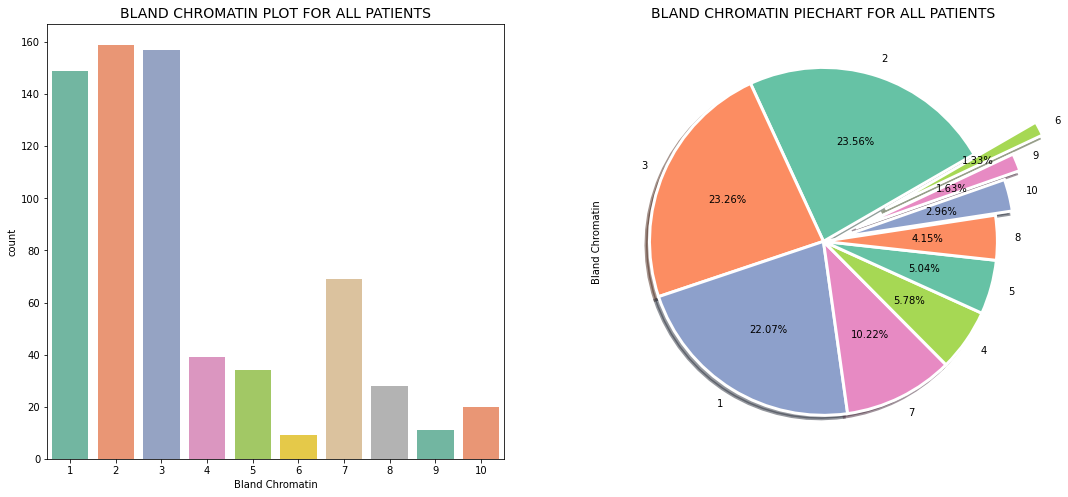

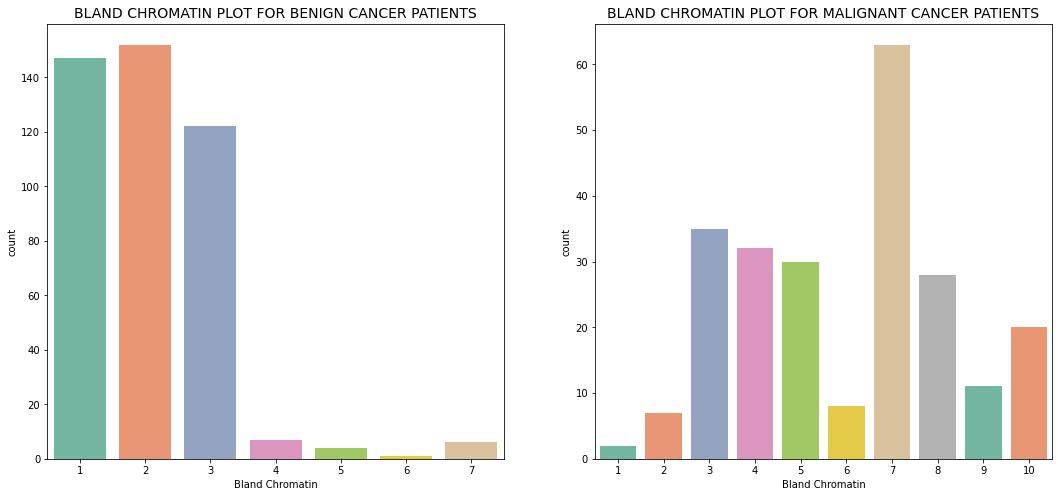

In [45]:
# plotting 'Bland Chromatin' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Bland Chromatin'], palette='Set2')
plt.title('BLAND CHROMATIN PLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Bland Chromatin"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2",5),startangle = 30,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.0,.0,.0,.0,.0,.1,.2,.4,], shadow=True)
plt.title('BLAND CHROMATIN PIECHART FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for benign patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Class0['Bland Chromatin'], palette='Set2')
plt.title('BLAND CHROMATIN PLOT FOR BENIGN CANCER PATIENTS', fontsize=14, weight='light')

# plotting 'Clump Thickness' distribution for malignant patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Class1['Bland Chromatin'], palette='Set2')
plt.title('BLAND CHROMATIN PLOT FOR MALIGNANT CANCER PATIENTS', fontsize=14, weight='light' )
plt.show()

In [46]:
# Distribution of patients based on Bland Chromatin
plot_criteria= ['Bland Chromatin', 'Class']
cm = sns.light_palette("lightblue", as_cmap=True)
(round(pd.crosstab(df2[plot_criteria[0]], df2[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

Class,benign,malignant
Bland Chromatin,,
1,33.490000,0.850000
2,34.620000,2.970000
3,27.790000,14.830000
4,1.590000,13.560000
5,0.910000,12.710000
6,0.230000,3.390000
7,1.370000,26.690000
8,0.000000,11.860000
9,0.000000,4.660000


**Distribution of Normal Nucleoli**

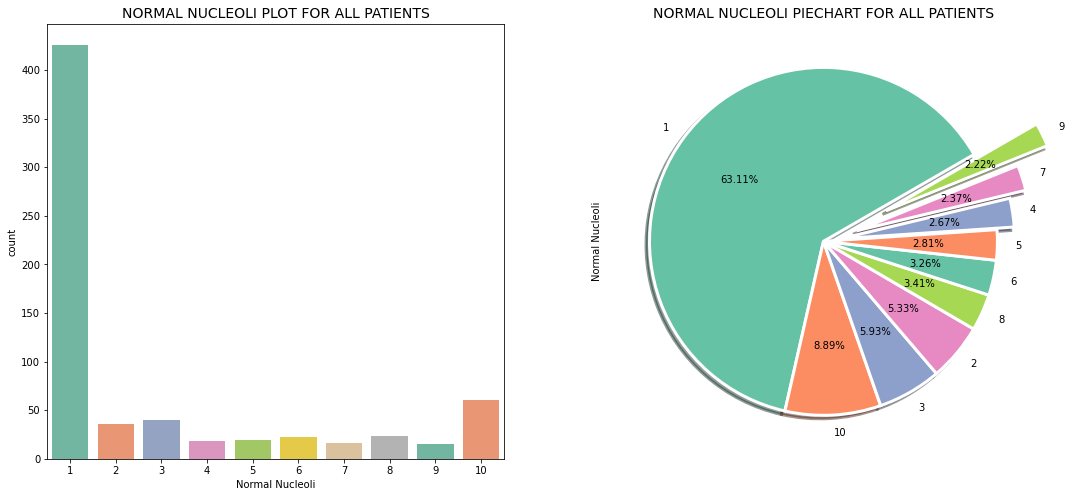

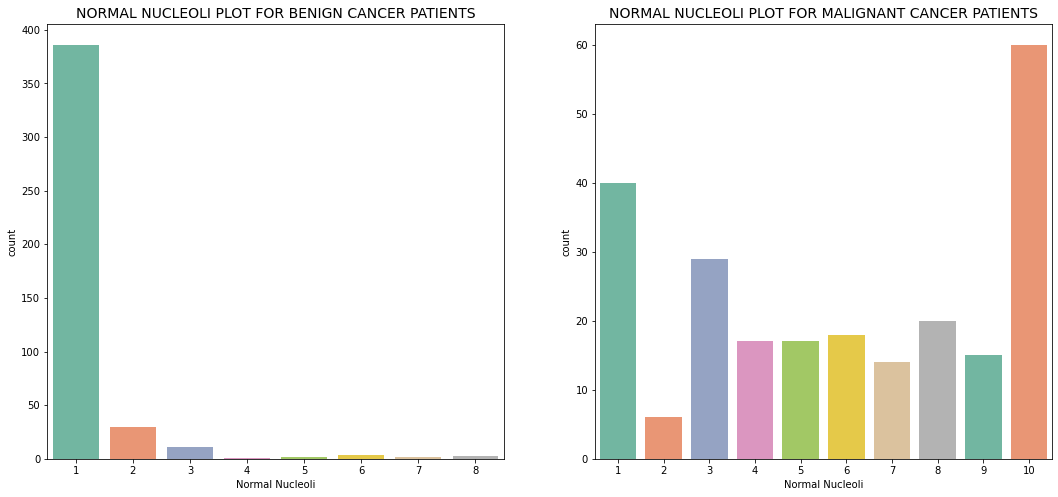

In [47]:
# plotting 'Normal Nucleoli' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Normal Nucleoli'], palette='Set2')
plt.title('NORMAL NUCLEOLI PLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Normal Nucleoli"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2",5),startangle = 30,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.0,.0,.0,.0,.0,.1,.2,.4,], shadow=True)
plt.title('NORMAL NUCLEOLI PIECHART FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for benign patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Class0['Normal Nucleoli'], palette='Set2')
plt.title('NORMAL NUCLEOLI PLOT FOR BENIGN CANCER PATIENTS', fontsize=14, weight='light')

# plotting 'Clump Thickness' distribution for malignant patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Class1['Normal Nucleoli'], palette='Set2')
plt.title('NORMAL NUCLEOLI PLOT FOR MALIGNANT CANCER PATIENTS', fontsize=14, weight='light' )
plt.show()

In [48]:
# Distribution of patients based on Normal Nucleoli
plot_criteria= ['Normal Nucleoli', 'Class']
cm = sns.light_palette("lightblue", as_cmap=True)
(round(pd.crosstab(df2[plot_criteria[0]], df2[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

Class,benign,malignant
Normal Nucleoli,,
1,87.930000,16.950000
2,6.830000,2.540000
3,2.510000,12.290000
4,0.230000,7.200000
5,0.460000,7.200000
6,0.910000,7.630000
7,0.460000,5.930000
8,0.680000,8.470000
9,0.000000,6.360000


**Distribution of Mitoses**

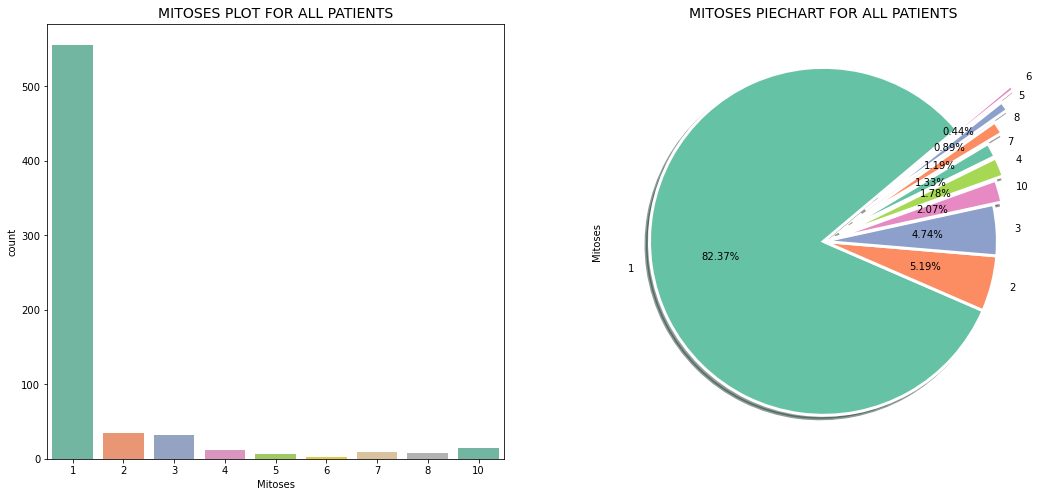

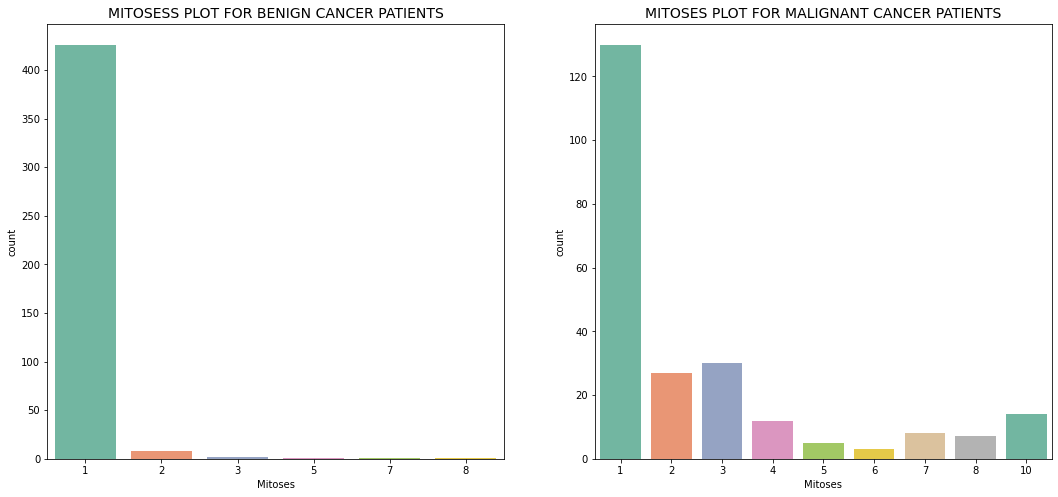

In [49]:
# plotting 'Mitoses' distribution for the entire dataset

# plotting for entire distribution
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df2['Mitoses'], palette='Set2')
plt.title('MITOSES PLOT FOR ALL PATIENTS', fontsize=14, weight='light')

# plotting for entire distribution - piechart
ax1 = plt.subplot2grid((1,2),(0,1))
df2["Mitoses"].value_counts().plot.pie(autopct = "%1.2f%%",colors = sns.color_palette("Set2",5),startangle = 40,
wedgeprops={"linewidth":3,"edgecolor":"w"},explode=[.0,.0,.0,.1/2,.1,.1,.2,.3,.4,], shadow=True)
plt.title('MITOSES PIECHART FOR ALL PATIENTS', fontsize=14, weight='light' )

# plotting 'Clump Thickness' distribution for benign patients
fig = plt.figure(figsize=(18,8))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(Class0['Mitoses'], palette='Set2')
plt.title('MITOSESS PLOT FOR BENIGN CANCER PATIENTS', fontsize=14, weight='light')

# plotting 'Clump Thickness' distribution for malignant patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(Class1['Mitoses'], palette='Set2')
plt.title('MITOSES PLOT FOR MALIGNANT CANCER PATIENTS', fontsize=14, weight='light' )
plt.show()

In [50]:
# Distribution of patients based on Mitoses
plot_criteria= ['Mitoses', 'Class']
cm = sns.light_palette("lightblue", as_cmap=True)
(round(pd.crosstab(df2[plot_criteria[0]], df2[plot_criteria[1]], normalize='columns')* 100,2)).style.background_gradient(cmap = cm)

Class,benign,malignant
Mitoses,,
1,97.040000,55.080000
2,1.820000,11.440000
3,0.460000,12.710000
4,0.000000,5.080000
5,0.230000,2.120000
6,0.000000,1.270000
7,0.230000,3.390000
8,0.230000,2.970000
10,0.000000,5.930000


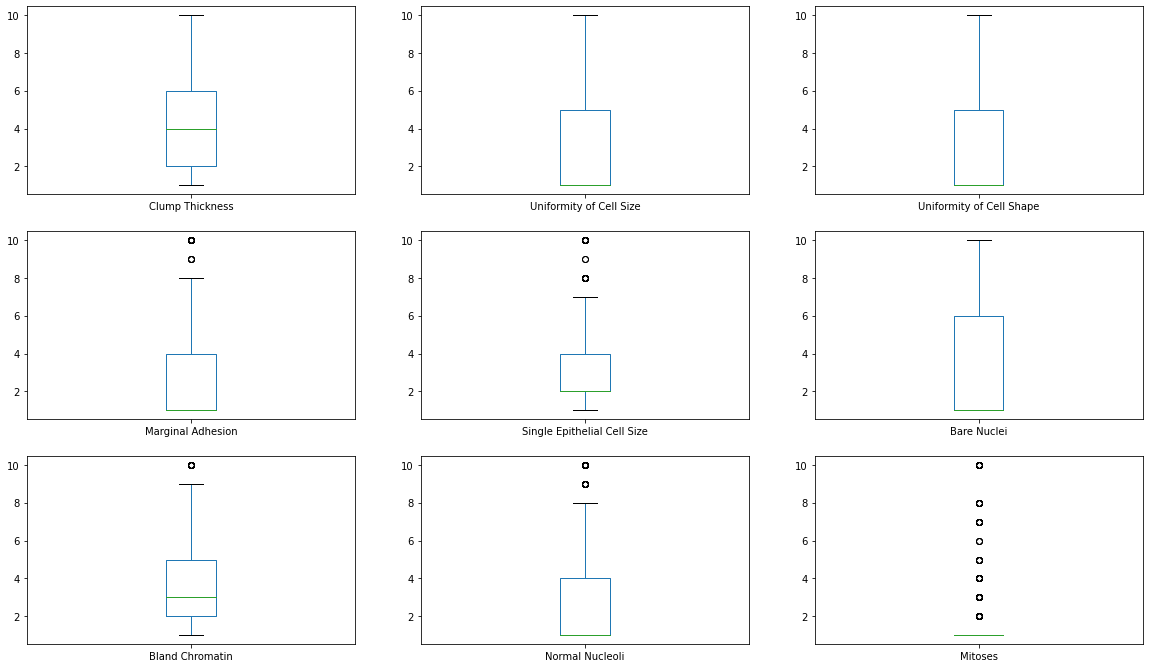

In [51]:
# box and whiskers plot
df2.plot(kind='box', subplots=True, layout=(5,3), figsize=(20,20))
plt.show()

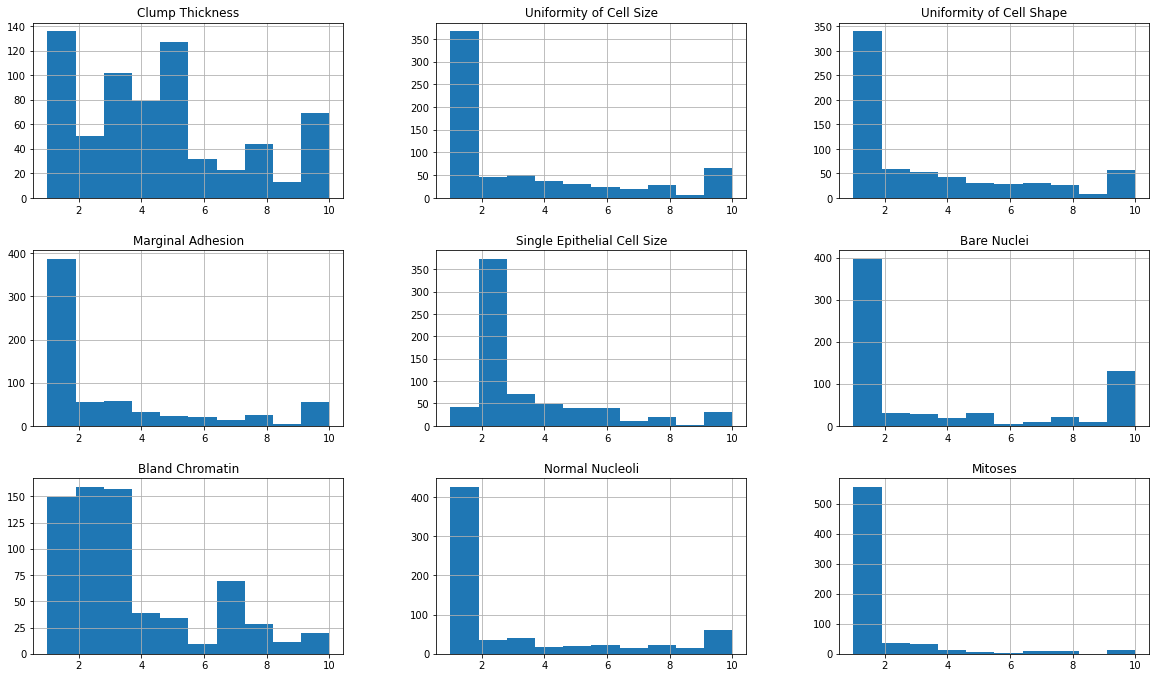

In [52]:
df2.hist(figsize=(20,20), layout=(5,3));

# Machine Learning Part B

In [53]:
# Python libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# ML algorithms & cross validation libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
import xgboost as xgb

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Python libraries for machine learning evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.metrics import matthews_corrcoef,fbeta_score,log_loss,precision_score,f1_score,recall_score
from sklearn import metrics

from scipy import stats


Preparing the data for Model 

Feature Normalization

In [54]:
# Converting categorical attributes to 1 & 0 for ML modelling

df2['Class'][df2['Class'] == 'benign'] = 0
df2['Class'][df2['Class'] == 'malignant'] = 1

df2['Class'] = df2['Class'].astype(np.int64)

df2.head(2)



,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0


In [55]:
# rechecking shape of dataset
df2.shape

(675, 10)

In [56]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
df2[columns_to_scale] = StandardScaler.fit_transform(df2[columns_to_scale])

In [57]:
df2.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.194464,-0.703193,-0.742647,-0.643363,-0.557185,-0.698117,-0.180648,-0.615645,-0.349142,0
1,0.194464,0.279530,0.265978,0.748529,1.708477,1.777692,-0.180648,-0.289203,-0.349142,0
2,-0.515066,-0.703193,-0.742647,-0.643363,-0.557185,-0.423027,-0.180648,-0.615645,-0.349142,0
3,0.549228,1.589828,1.610811,-0.643363,-0.104053,0.127153,-0.180648,1.343005,-0.349142,0
4,-0.160301,-0.703193,-0.742647,0.052583,-0.557185,-0.698117,-0.180648,-0.615645,-0.349142,0


In [58]:
#seperating 'goal' variable from other features
X2 = df2.drop(['Class'], axis=1) 
y2 = df2['Class']

In [59]:
X2.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.194464,-0.703193,-0.742647,-0.643363,-0.557185,-0.698117,-0.180648,-0.615645,-0.349142
1,0.194464,0.279530,0.265978,0.748529,1.708477,1.777692,-0.180648,-0.289203,-0.349142
2,-0.515066,-0.703193,-0.742647,-0.643363,-0.557185,-0.423027,-0.180648,-0.615645,-0.349142
3,0.549228,1.589828,1.610811,-0.643363,-0.104053,0.127153,-0.180648,1.343005,-0.349142
4,-0.160301,-0.703193,-0.742647,0.052583,-0.557185,-0.698117,-0.180648,-0.615645,-0.349142


In [60]:
y2.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

REchecking Correlation

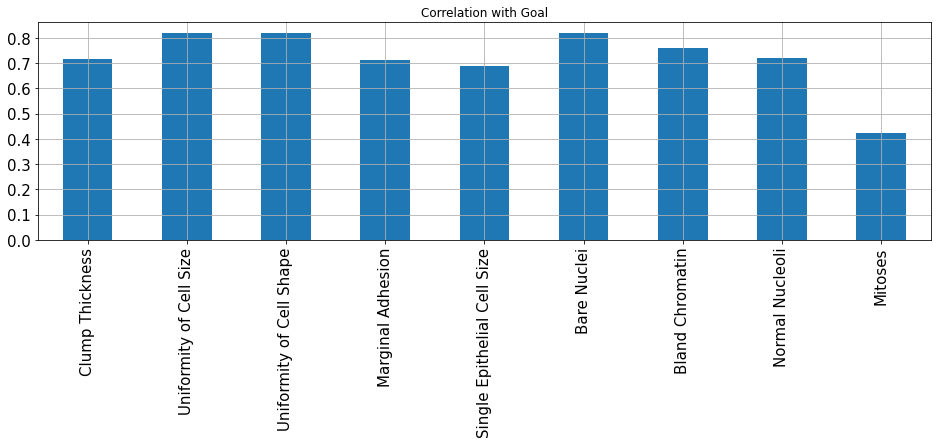

In [61]:
#Correlation with Response Variable class

X2.corrwith(y2).plot.bar(
        figsize = (16, 4), title = "Correlation with Goal", fontsize = 15,
        rot = 90, grid = True)
plt.show()

In [62]:
X_train2, X_test2,y_train2, y_test2=train_test_split(X2,y2,test_size=0.3,random_state=40)

In [63]:
## checking distribution of Goal variable in train test split
print(' ')
print('*****************************************************')
print("------'X' & 'y' Test & Train Sizes-------------------")
print('*****************************************************')
print('X_train Size = ', X_train2.size, '::::: X_test Size = ',X_test2.size)
print('y_train Size = ', y_train2.size, ' ::::: y_test Size = ', y_test2.size)

print(' ')

print('*****************************************************')
print('*****************************************************')

print('Distribution of Goal variable in training set')
print(y_train2.value_counts())

print('Distribution of Goal variable in test set')
print(y_test2.value_counts())

 
*****************************************************
------'X' & 'y' Test & Train Sizes-------------------
*****************************************************
X_train Size =  4248 ::::: X_test Size =  1827
y_train Size =  472  ::::: y_test Size =  203
 
*****************************************************
*****************************************************
Distribution of Goal variable in training set
0    311
1    161
Name: Class, dtype: int64
Distribution of Goal variable in test set
0    128
1     75
Name: Class, dtype: int64


In [64]:
print('*****************************************************')

print('Shape of "Training Set" X_train and Y_train')
print('X_train = ', X_train2.shape, ' ::::: y_train = ', y_train2.shape)
print(' ')
print('*****************************************************')
print('*****************************************************')

print('Shape of "Test Sets" X_test and Y_test')
print('X_test  =  ', X_test2.shape, ' ::::: y_test = ', y_test2.shape)
print(' ')
print('*****************************************************')

*****************************************************
Shape of "Training Set" X_train and Y_train
X_train =  (472, 9)  ::::: y_train =  (472,)
 
*****************************************************
*****************************************************
Shape of "Test Sets" X_test and Y_test
X_test  =   (203, 9)  ::::: y_test =  (203,)
 
*****************************************************


# Cross Validation of Models

In [65]:
import xgboost as xgb
# function initializing baseline machine learning models
def GetBasedModel2():
    basedModels = []
    basedModels.append(('LR_L2'   , LogisticRegression(penalty='l2')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN7'  , KNeighborsClassifier(7)))
    basedModels.append(('KNN5'  , KNeighborsClassifier(5)))
    basedModels.append(('KNN9'  , KNeighborsClassifier(9)))
    basedModels.append(('KNN11'  , KNeighborsClassifier(11)))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM Linear'  , SVC(kernel='linear',gamma='auto',probability=True)))
    basedModels.append(('SVM RBF'  , SVC(kernel='rbf',gamma='auto',probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier(n_estimators=100,max_features='sqrt')))
    basedModels.append(('RF_Ent100'   , RandomForestClassifier(criterion='entropy',n_estimators=100)))
    basedModels.append(('RF_Gini100'   , RandomForestClassifier(criterion='gini',n_estimators=100)))
    basedModels.append(('ET100'   , ExtraTreesClassifier(n_estimators= 100)))
    basedModels.append(('ET500'   , ExtraTreesClassifier(n_estimators= 500)))
    basedModels.append(('MLP', MLPClassifier()))
    basedModels.append(('SGD3000', SGDClassifier(max_iter=1000, tol=1e-4)))
    basedModels.append(('XGB_2000', xgb.XGBClassifier(n_estimators= 2000, eval_metric='mlogloss')))
    basedModels.append(('XGB_500', xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')))
    basedModels.append(('XGB_100', xgb.XGBClassifier(n_estimators= 100, eval_metric='mlogloss')))
    basedModels.append(('XGB_1000', xgb.XGBClassifier(n_estimators= 1000, eval_metric='mlogloss')))
    basedModels.append(('ET1000'   , ExtraTreesClassifier(n_estimators= 1000)))
    
    return basedModels

In [66]:
# function for performing 10-fold cross validation of all the baseline models
def BasedLine2(X_train2, y_train2,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'
    seed = 7
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train2, y_train2, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
         
        
    return results,msg

In [67]:
models = GetBasedModel2()
names,results = BasedLine2(X_train2, y_train2,models)

LR_L2: 0.966090 (0.014103)
LDA: 0.959752 (0.028983)
KNN7: 0.976640 (0.020077)
KNN5: 0.972385 (0.016635)
KNN9: 0.972473 (0.019097)
KNN11: 0.970346 (0.016979)
CART: 0.925709 (0.037262)
NB: 0.963874 (0.023433)
SVM Linear: 0.968218 (0.014243)
SVM RBF: 0.968174 (0.017210)
AB: 0.955496 (0.020001)
GBM: 0.968174 (0.017210)
RF_Ent100: 0.963963 (0.019156)
RF_Gini100: 0.970346 (0.016979)
ET100: 0.972429 (0.019179)
ET500: 0.970301 (0.017066)
MLP: 0.970346 (0.014063)
SGD3000: 0.944814 (0.042828)
XGB_2000: 0.959663 (0.024236)
XGB_500: 0.959663 (0.024236)
XGB_100: 0.957580 (0.019082)
XGB_1000: 0.959663 (0.024236)
ET1000: 0.974557 (0.018570)


# MODELS

# Logistics Regression

In [68]:
Lreg2 = LogisticRegression()
Lreg2.fit(X_train2, y_train2)
y_pred_Lreg2 = Lreg2.predict(X_test2)

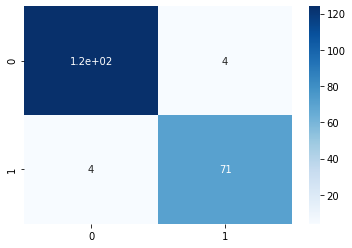

In [69]:
cm=confusion_matrix(y_test2,y_pred_Lreg2)
sns.heatmap(cm, annot=True,cmap='Blues')
#sns.heatmap(cm, annot=True,cmap='Blues', figsize=(18,6))
plt.show()

In [70]:
accuracy_score(y_test2,y_pred_Lreg2)

0.9605911330049262

In [71]:
print(classification_report(y_test2, y_pred_Lreg2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       128
           1       0.95      0.95      0.95        75

    accuracy                           0.96       203
   macro avg       0.96      0.96      0.96       203
weighted avg       0.96      0.96      0.96       203



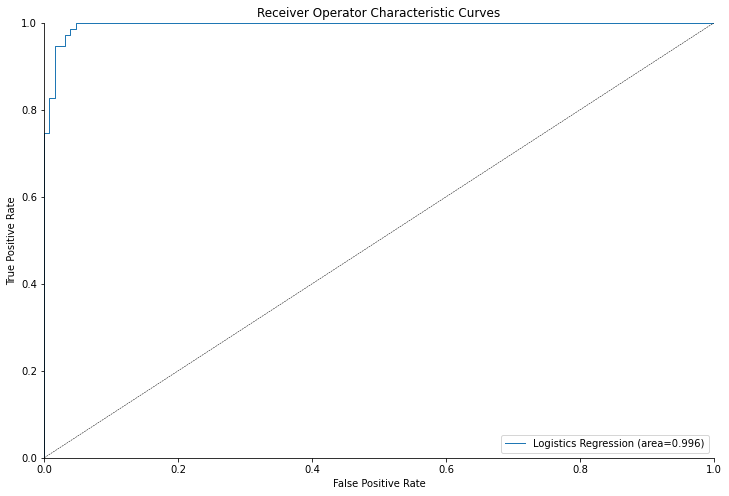

In [72]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,Lreg2.predict_proba(X_test2),label='Logistics Regression',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

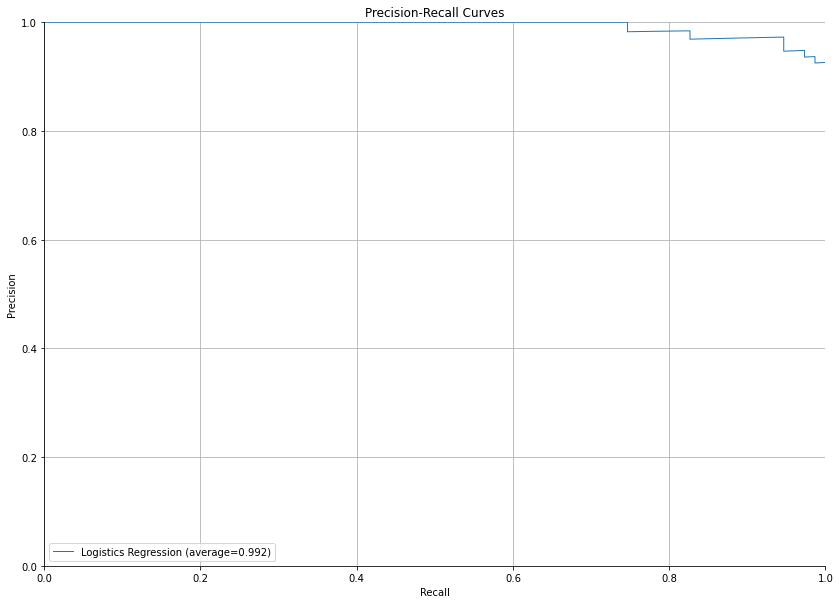

In [73]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test2,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test2, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,Lreg2.predict_proba(X_test2),label='Logistics Regression',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Random Forest Classifier (criterion = 'entropy')

In [74]:
rf_ent2 = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent2.fit(X_train2, y_train2)
y_pred_rfe2 = rf_ent2.predict(X_test2)

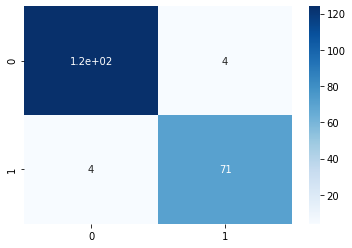

In [75]:
cm=confusion_matrix(y_test2,y_pred_rfe2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [76]:
accuracy_score(y_test2,y_pred_rfe2)

0.9605911330049262

In [77]:
print(classification_report(y_test2, y_pred_rfe2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       128
           1       0.95      0.95      0.95        75

    accuracy                           0.96       203
   macro avg       0.96      0.96      0.96       203
weighted avg       0.96      0.96      0.96       203



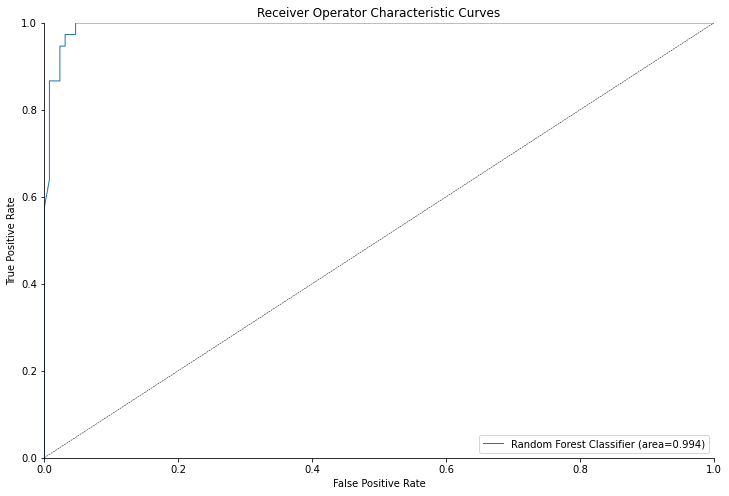

In [78]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,rf_ent2.predict_proba(X_test2),label='Random Forest Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curves')
sns.despine()

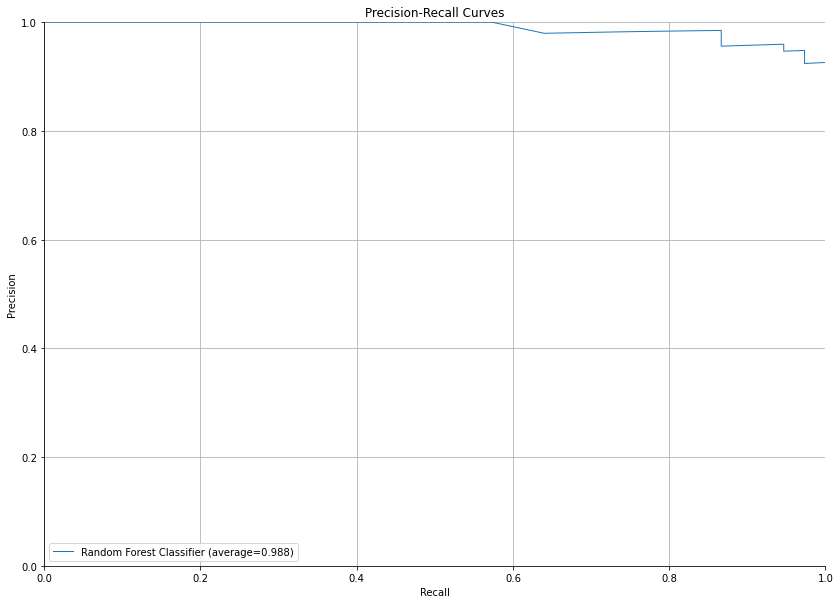

In [79]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,rf_ent2.predict_proba(X_test2),label='Random Forest Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curves')
sns.despine()

# Multi Layer Perceptron

In [80]:
mlp2 = MLPClassifier()
mlp2.fit(X_train2,y_train2)
y_pred_mlp2 = mlp2.predict(X_test2)

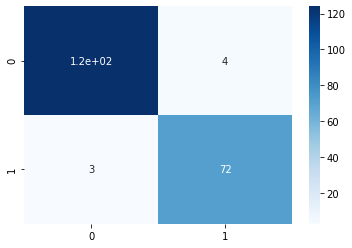

In [81]:
cm=confusion_matrix(y_test2,y_pred_mlp2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [82]:
accuracy_score(y_test2,y_pred_mlp2)

0.9655172413793104

In [83]:
print(classification_report(y_test2, y_pred_mlp2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       128
           1       0.95      0.96      0.95        75

    accuracy                           0.97       203
   macro avg       0.96      0.96      0.96       203
weighted avg       0.97      0.97      0.97       203



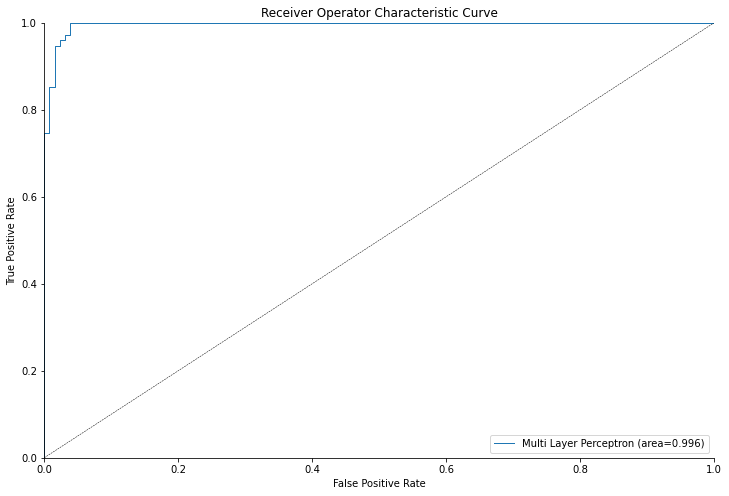

In [84]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,mlp2.predict_proba(X_test2),label='Multi Layer Perceptron',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

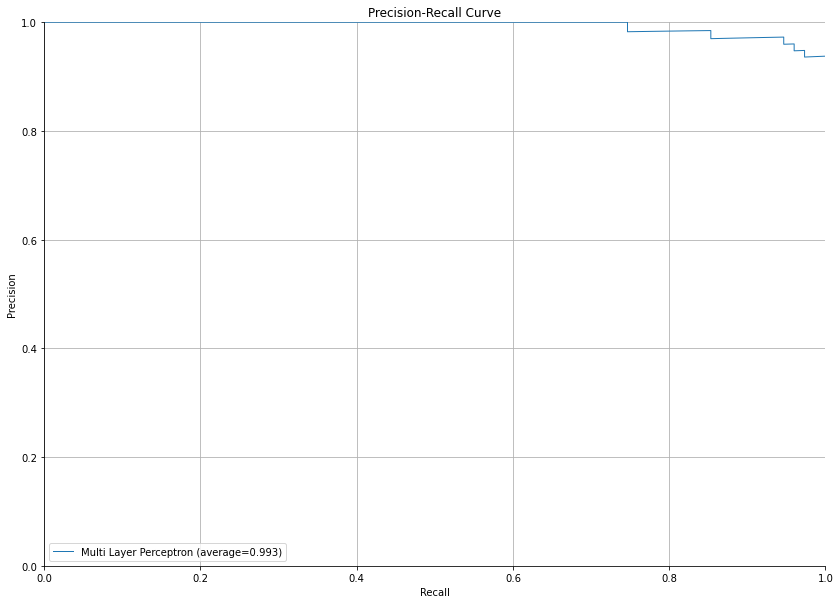

In [85]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,mlp2.predict_proba(X_test2),label='Multi Layer Perceptron',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# K' Nearest Neighbour (n=9)

In [86]:
knn2 = KNeighborsClassifier(9)
knn2.fit(X_train2,y_train2)
y_pred_knn2 = knn2.predict(X_test2)

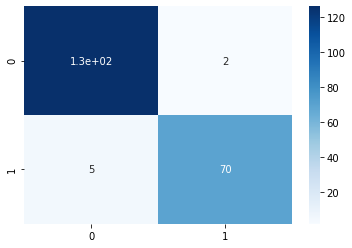

In [87]:
cm=confusion_matrix(y_test2,y_pred_knn2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [88]:
accuracy_score(y_test2,y_pred_knn2)

0.9655172413793104

In [89]:
print(classification_report(y_test2, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       128
           1       0.97      0.93      0.95        75

    accuracy                           0.97       203
   macro avg       0.97      0.96      0.96       203
weighted avg       0.97      0.97      0.97       203



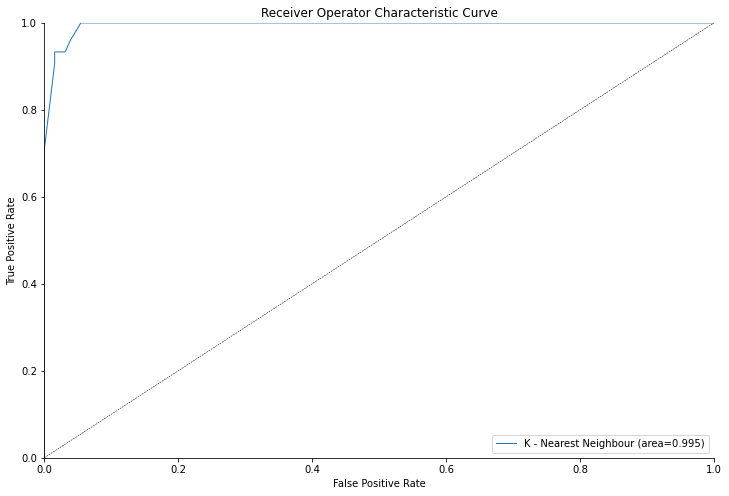

In [90]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,knn2.predict_proba(X_test2),label='K - Nearest Neighbour',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

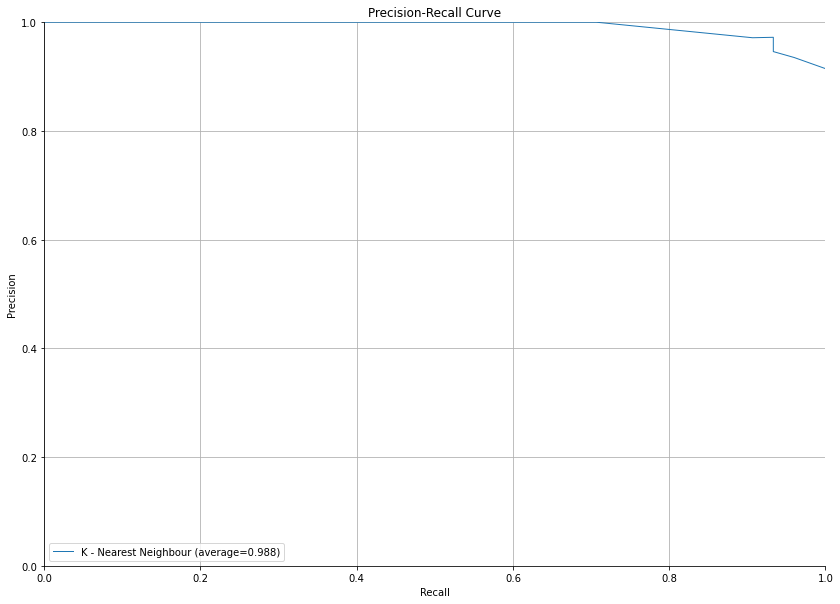

In [91]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,knn2.predict_proba(X_test2),label='K - Nearest Neighbour',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Extra Tree Classifier (n_estimators=500)

In [92]:
et_100_2 = ExtraTreesClassifier(n_estimators= 100)
et_100_2.fit(X_train2,y_train2)
y_pred_et_100_2 = et_100_2.predict(X_test2)

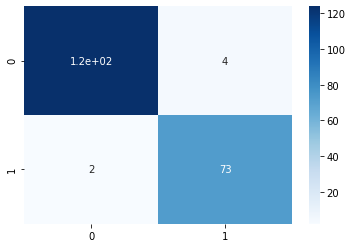

In [93]:
cm=confusion_matrix(y_test2,y_pred_et_100_2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [94]:
accuracy_score(y_test2,y_pred_et_100_2)

0.9704433497536946

In [95]:
print(classification_report(y_test2, y_pred_et_100_2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       128
           1       0.95      0.97      0.96        75

    accuracy                           0.97       203
   macro avg       0.97      0.97      0.97       203
weighted avg       0.97      0.97      0.97       203



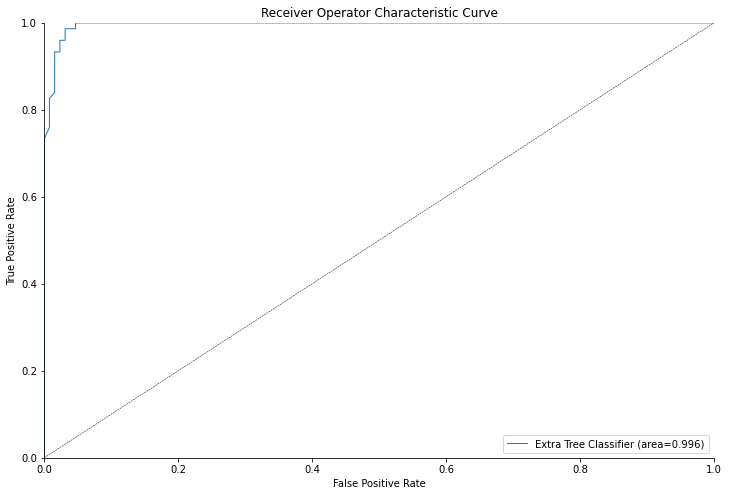

In [96]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,et_100_2.predict_proba(X_test2),label='Extra Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

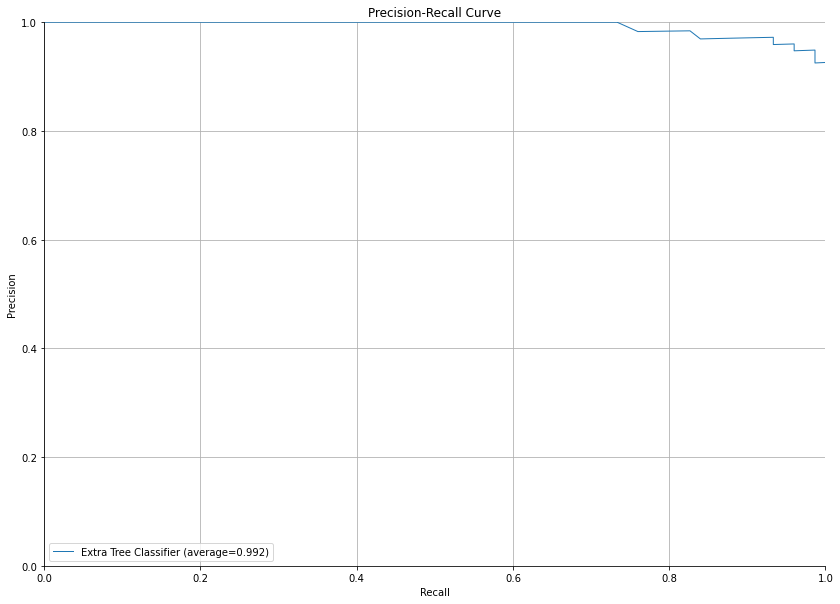

In [97]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,et_100_2.predict_proba(X_test2),label='Extra Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# XGBoost (n_estimators=500)

In [98]:
import xgboost as xgb
xgb2 = xgb.XGBClassifier(n_estimators= 500, eval_metric='mlogloss')
xgb2.fit(X_train2,y_train2)
y_pred_xgb2 = xgb2.predict(X_test2)

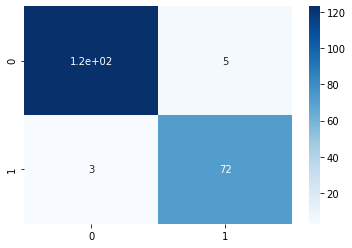

In [99]:
cm=confusion_matrix(y_test2,y_pred_xgb2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [100]:
accuracy_score(y_test2,y_pred_xgb2)

0.9605911330049262

In [101]:
print(classification_report(y_test2, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.94      0.96      0.95        75

    accuracy                           0.96       203
   macro avg       0.96      0.96      0.96       203
weighted avg       0.96      0.96      0.96       203



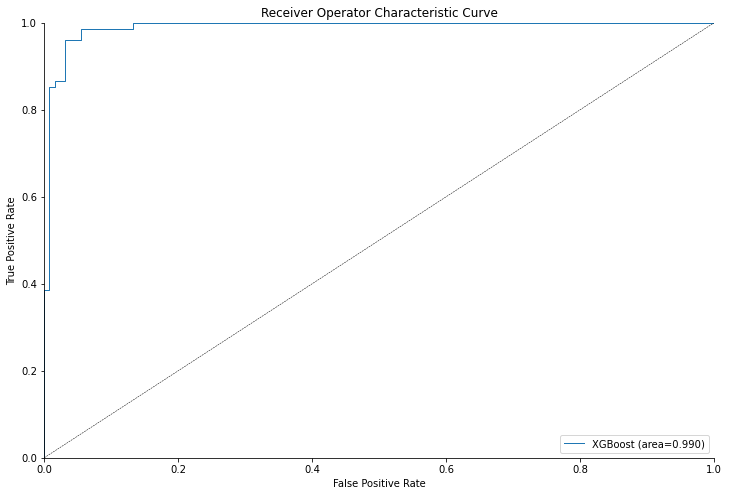

In [102]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,xgb2.predict_proba(X_test2),label='XGBoost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

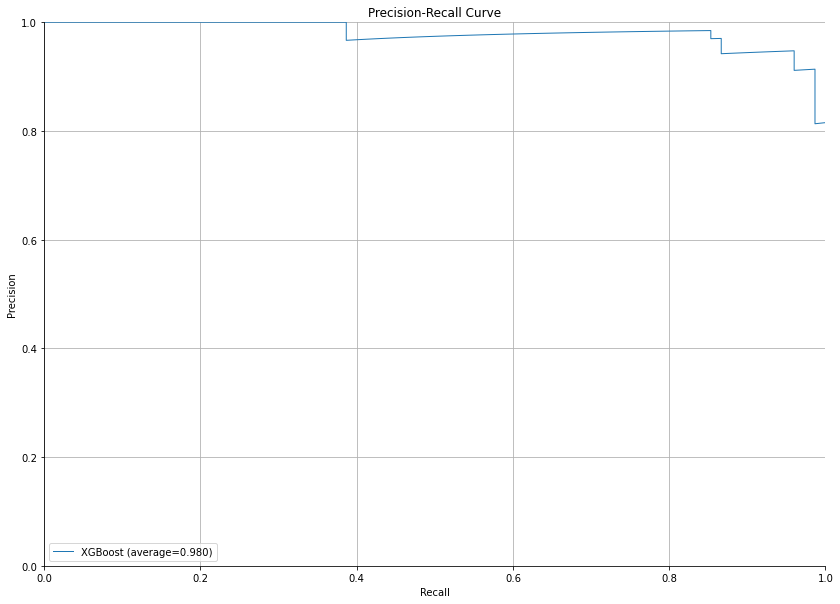

In [103]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,xgb2.predict_proba(X_test2),label='XGBoost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Support Vector Classifier (kernel='linear')

In [104]:
svc2 = SVC(kernel='linear',gamma='auto',probability=True)
svc2.fit(X_train2,y_train2)
y_pred_svc2 = svc2.predict(X_test2)

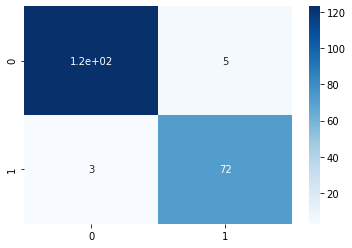

In [105]:
cm=confusion_matrix(y_test2,y_pred_svc2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [106]:
accuracy_score(y_test2,y_pred_svc2)

0.9605911330049262

In [107]:
print(classification_report(y_test2, y_pred_svc2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.94      0.96      0.95        75

    accuracy                           0.96       203
   macro avg       0.96      0.96      0.96       203
weighted avg       0.96      0.96      0.96       203



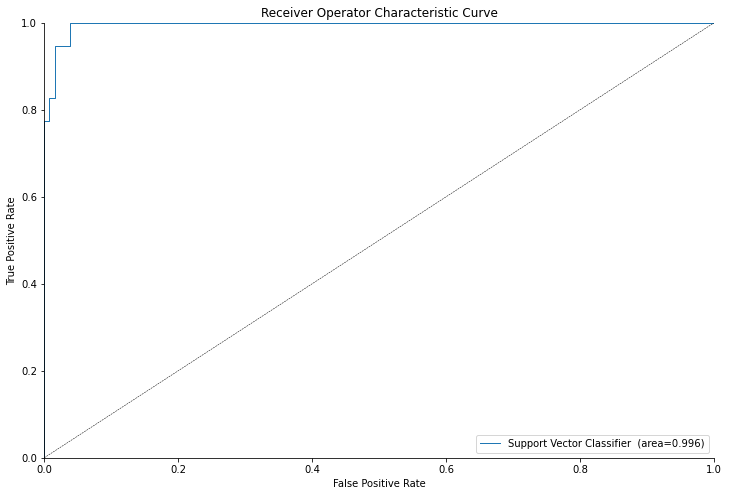

In [108]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,svc2.predict_proba(X_test2),label='Support Vector Classifier ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

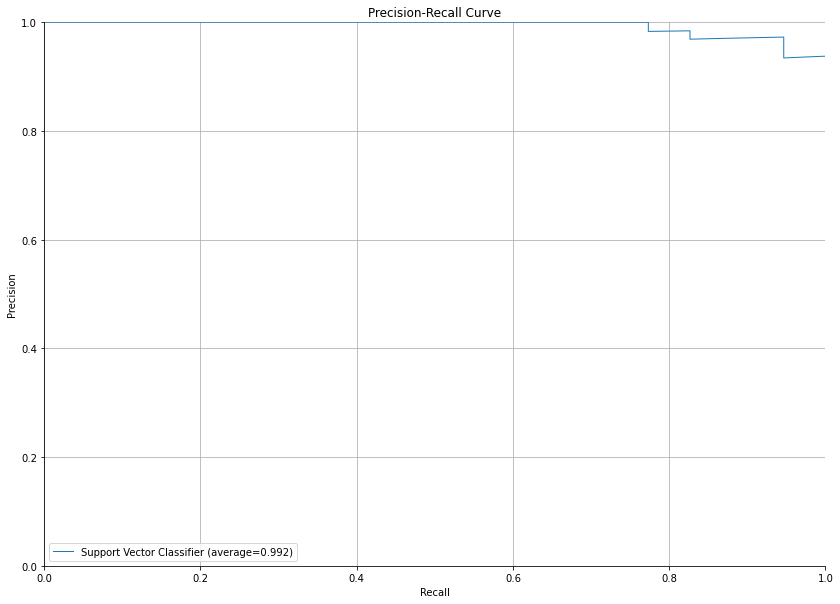

In [109]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,svc2.predict_proba(X_test2),label='Support Vector Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Stochastic Gradient Descent

In [110]:
sgd2 = SGDClassifier(max_iter=1000, tol=1e-4)
sgd2.fit(X_train2,y_train2)
y_pred_sgd2 = sgd2.predict(X_test2)

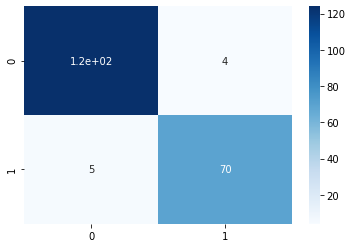

In [111]:
cm=confusion_matrix(y_test2,y_pred_sgd2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [112]:
accuracy_score(y_test2,y_pred_sgd2)

0.9556650246305419

In [113]:
print(classification_report(y_test2, y_pred_sgd2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       128
           1       0.95      0.93      0.94        75

    accuracy                           0.96       203
   macro avg       0.95      0.95      0.95       203
weighted avg       0.96      0.96      0.96       203



In [114]:
# f, ax = plt.subplots(figsize=(12,8))

# roc_auc_plot(y_test2,sgd2.predict_proba(X_test2),label='Stochastic Gradient Descent',l='-')

# ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
#         )    
# ax.legend(loc="lower right")    
# ax.set_xlabel('False Positive Rate')
# ax.set_ylabel('True Positive Rate')
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Receiver Operator Characteristic Curve')
# sns.despine()

In [115]:
# f, ax = plt.subplots(figsize=(14,10))

# precision_recall_plot(y_test2,sgd2.predict_proba(X_test2),label='Stochastic Gradient Descent',l='-')
# ax.set_xlabel('Recall')
# ax.set_ylabel('Precision')
# ax.legend(loc="lower left")
# ax.grid(True)
# ax.set_xlim([0, 1])
# ax.set_ylim([0, 1])
# ax.set_title('Precision-Recall Curve')
# sns.despine()

# Adaboost Classifier

In [116]:
ada2 = AdaBoostClassifier()
ada2.fit(X_train2,y_train2)
y_pred_ada2 = ada2.predict(X_test2)

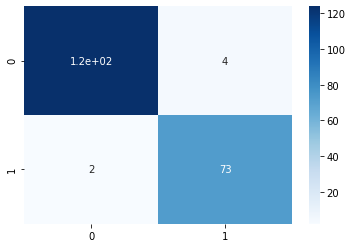

In [117]:
cm=confusion_matrix(y_test2,y_pred_ada2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [118]:
accuracy_score(y_test2,y_pred_ada2)

0.9704433497536946

In [119]:
print(classification_report(y_test2, y_pred_ada2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       128
           1       0.95      0.97      0.96        75

    accuracy                           0.97       203
   macro avg       0.97      0.97      0.97       203
weighted avg       0.97      0.97      0.97       203



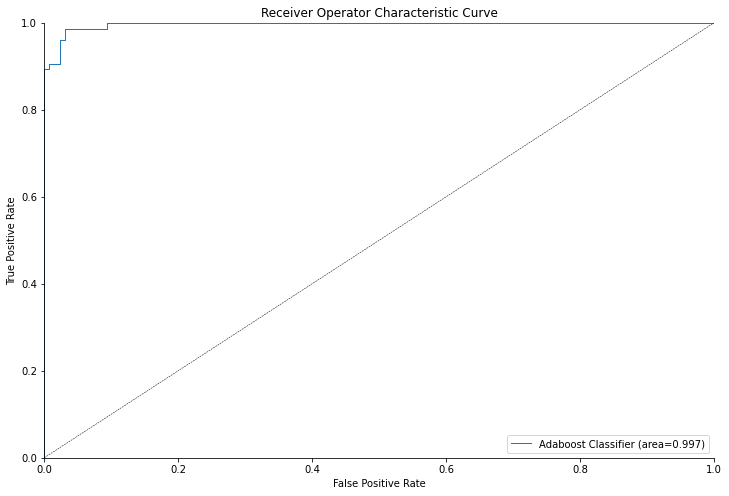

In [120]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,ada2.predict_proba(X_test2),label='Adaboost Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

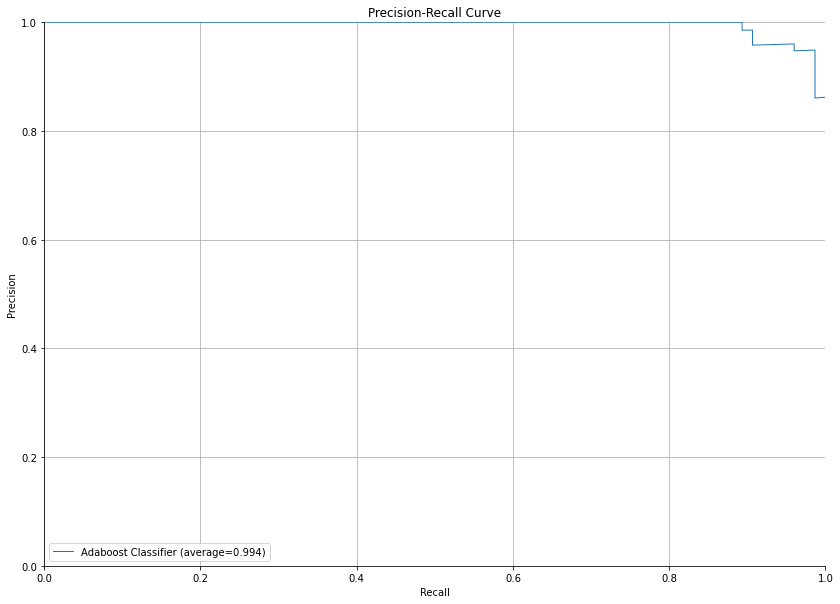

In [121]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,ada2.predict_proba(X_test2),label='Adaboost Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Decision Tree Classifier (CART)

In [122]:
#Visualizing the tree
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

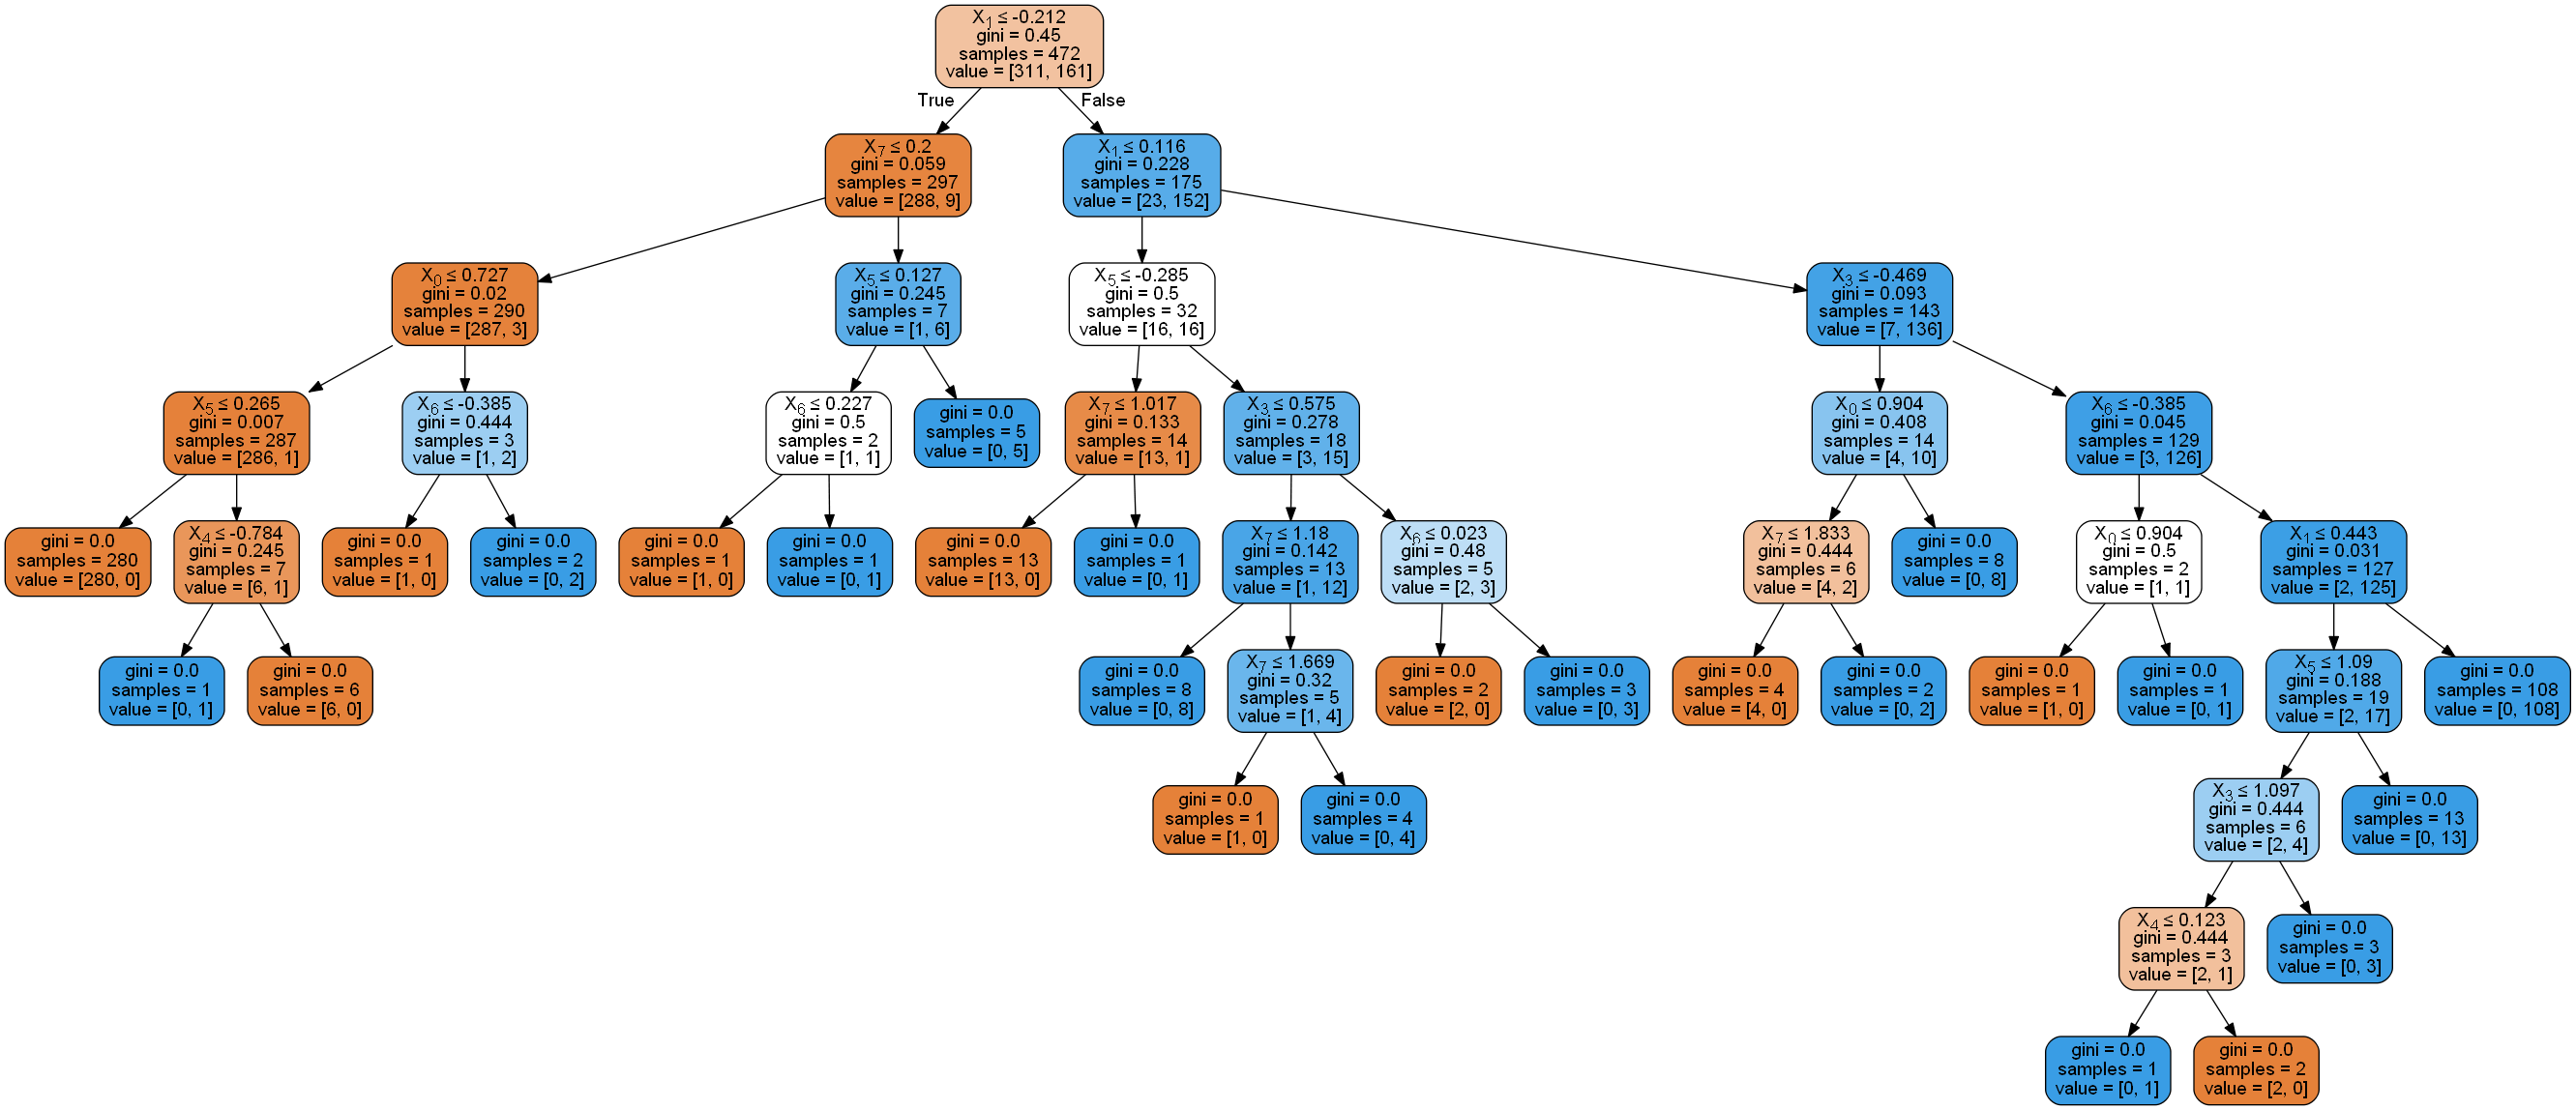

In [123]:
dtc2 = DecisionTreeClassifier()
DT2 = dtc2.fit(X_train2,y_train2)
y_pred_dtc2 = dtc2.predict(X_test2)

dot_data = StringIO()
export_graphviz(DT2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

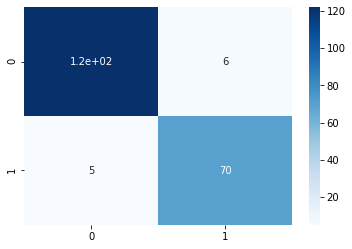

In [124]:
cm=confusion_matrix(y_test2,y_pred_dtc2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [125]:
accuracy_score(y_test2,y_pred_dtc2)

0.9458128078817734

In [126]:
print(classification_report(y_test2, y_pred_dtc2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       128
           1       0.92      0.93      0.93        75

    accuracy                           0.95       203
   macro avg       0.94      0.94      0.94       203
weighted avg       0.95      0.95      0.95       203



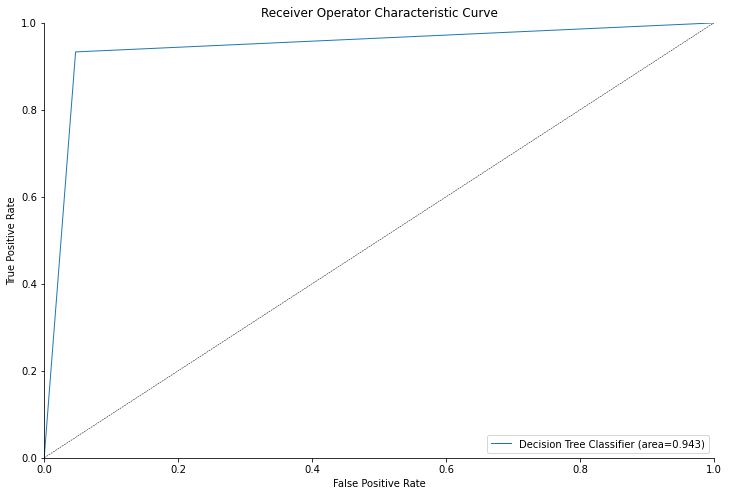

In [127]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,dtc2.predict_proba(X_test2),label='Decision Tree Classifier',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

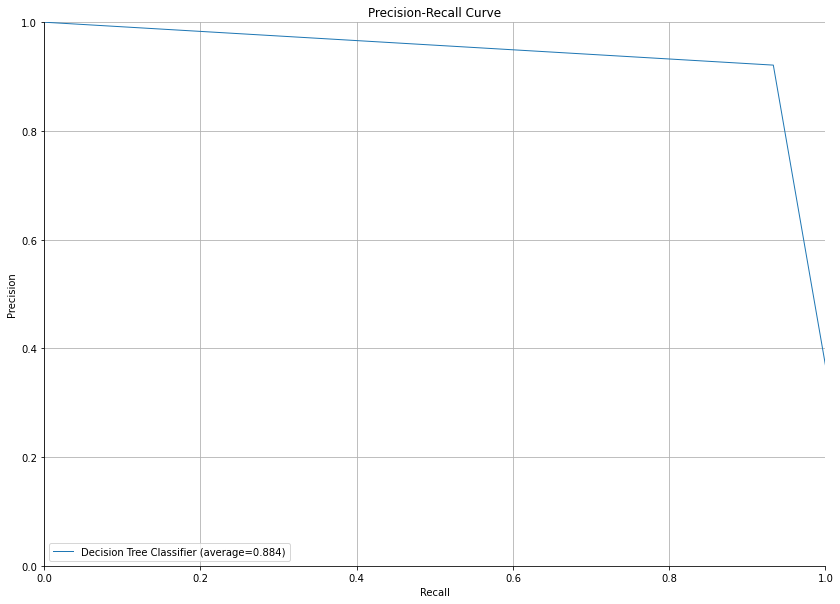

In [128]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,dtc2.predict_proba(X_test2),label='Decision Tree Classifier',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Gradient Boosting Machine

In [129]:
gbm2 = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm2.fit(X_train2,y_train2)
y_pred_gbm2 = gbm2.predict(X_test2)

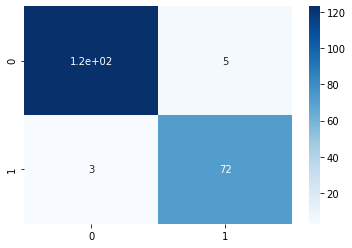

In [130]:
cm=confusion_matrix(y_test2,y_pred_gbm2)
sns.heatmap(cm, annot=True,cmap='Blues')
plt.show()

In [131]:
accuracy_score(y_test2,y_pred_gbm2)

0.9605911330049262

In [132]:
print(classification_report(y_test2, y_pred_gbm2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.94      0.96      0.95        75

    accuracy                           0.96       203
   macro avg       0.96      0.96      0.96       203
weighted avg       0.96      0.96      0.96       203



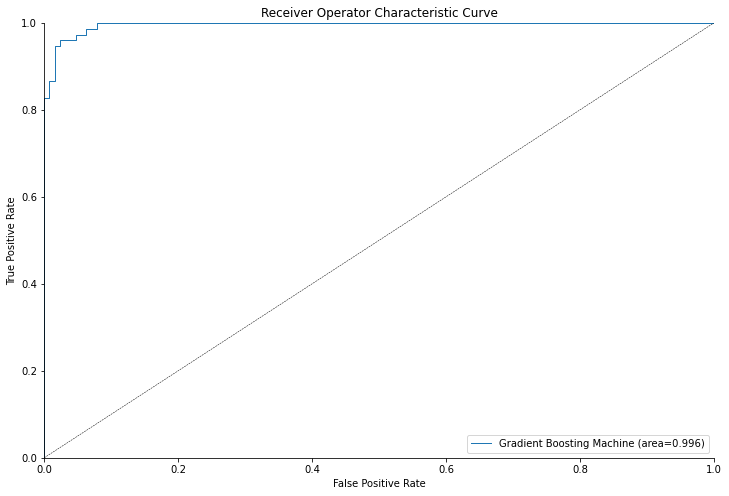

In [133]:
f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test2,gbm2.predict_proba(X_test2),label='Gradient Boosting Machine',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic Curve')
sns.despine()

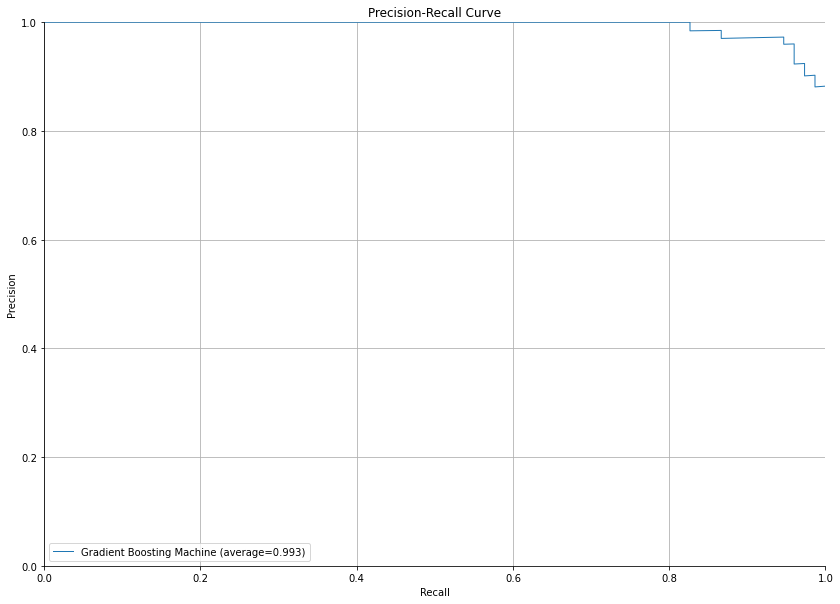

In [134]:
f, ax = plt.subplots(figsize=(14,10))

precision_recall_plot(y_test2,gbm2.predict_proba(X_test2),label='Gradient Boosting Machine',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-Recall Curve')
sns.despine()

# Comparison of All Models

Model	/ Accuracy	/ Precision	/ Sensitivity	/ Specificity	/ F1 Score	/ ROC	/ Log_Loss	/ mathew_corrcoef

In [135]:
CM2=confusion_matrix(y_test2,y_pred_rfe2)
#sns.heatmap(CM, annot=True)

TN2 = CM2[0][0]
FN2 = CM2[1][0]
TP2 = CM2[1][1]
FP2 = CM2[0][1]
specificity2 = TN2/(TN2+FP2)
loss_log2 = log_loss(y_test2, y_pred_rfe2)
acc2= accuracy_score(y_test2, y_pred_rfe2)
roc2=roc_auc_score(y_test2, y_pred_rfe2)
prec2 = precision_score(y_test2, y_pred_rfe2)
rec2 = recall_score(y_test2, y_pred_rfe2)
f1_2 = f1_score(y_test2, y_pred_rfe2)

mathew2 = matthews_corrcoef(y_test2, y_pred_rfe2)
model_results2 =pd.DataFrame([['Random Forest',acc2, prec2,rec2,specificity2, f1_2,roc2, loss_log2,mathew2]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])


In [136]:
data2 = {       'MLP': y_pred_mlp2, 
                'KNN': y_pred_knn2, 
                'EXtra tree classifier': y_pred_et_100_2,
                'XGB': y_pred_xgb2, 
                'SVC': y_pred_svc2, 
                'SGD': y_pred_sgd2,
                'Adaboost': y_pred_ada2, 
                'CART': y_pred_dtc2, 
                'GBM': y_pred_gbm2 }

models2 = pd.DataFrame(data2) 
 
for column2 in models2:
    CM2=confusion_matrix(y_test2,models2[column2])
    
    TN2 = CM2[0][0]
    FN2 = CM2[1][0]
    TP2 = CM2[1][1]
    FP2 = CM2[0][1]
    specificity2 = TN2/(TN2+FP2)
    loss_log2 = log_loss(y_test2, models2[column2])
    acc2= accuracy_score(y_test2, models2[column2])
    roc2=roc_auc_score(y_test2, models2[column2])
    prec2 = precision_score(y_test2, models2[column2])
    rec2 = recall_score(y_test2, models2[column2])
    f1_2 = f1_score(y_test2, models2[column2])
    mathew2 = matthews_corrcoef(y_test2, models2[column2])
    
    results2 =pd.DataFrame([[column2,acc2, prec2,rec2,specificity2, f1_2,roc2, loss_log2,mathew2]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])
    model_results2 = model_results2.append(results2, ignore_index = True)


model_results2

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.960591,0.946667,0.946667,0.968750,0.946667,0.957708,1.361150,0.915417
1,MLP,0.965517,0.947368,0.960000,0.968750,0.953642,0.964375,1.191008,0.926245
2,KNN,0.965517,0.972222,0.933333,0.984375,0.952381,0.958854,1.191000,0.925845
3,EXtra tree classifier,0.970443,0.948052,0.973333,0.968750,0.960526,0.971042,1.020866,0.937118
4,XGB,0.960591,0.935065,0.960000,0.960938,0.947368,0.960469,1.361154,0.916084
5,SVC,0.960591,0.935065,0.960000,0.960938,0.947368,0.960469,1.361154,0.916084
6,SGD,0.955665,0.945946,0.933333,0.968750,0.939597,0.951042,1.531292,0.904631
7,Adaboost,0.970443,0.948052,0.973333,0.968750,0.960526,0.971042,1.020866,0.937118
8,CART,0.945813,0.921053,0.933333,0.953125,0.927152,0.943229,1.871583,0.884067
9,GBM,0.960591,0.935065,0.960000,0.960938,0.947368,0.960469,1.361154,0.916084


# Findings:


AS we can see from above results, ExtraTree Classifier tied with Adaboost as best performers as they highest test accuracy of 0.970443, sensitivity of 0.97, specificity of 0.97, highest f1-score of 0.96 and lowest Log Loss of 1.02.

# ROC AUC Curve of Top Performing Models - Combined

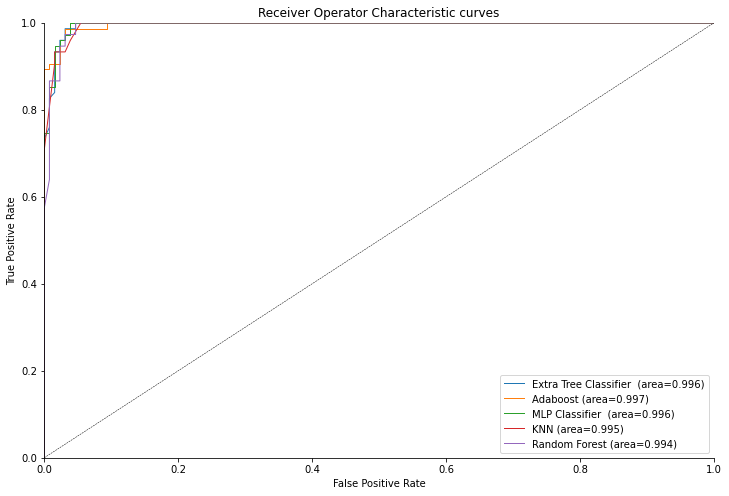

In [139]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))



roc_auc_plot(y_test2,et_100_2.predict_proba(X_test2),label='Extra Tree Classifier ',l='-')
roc_auc_plot(y_test2,ada2.predict_proba(X_test2),label='Adaboost',l='-')
roc_auc_plot(y_test2,mlp2.predict_proba(X_test2),label='MLP Classifier ',l='-')
roc_auc_plot(y_test2,knn2.predict_proba(X_test2),label='KNN',l='-')
roc_auc_plot(y_test2,rf_ent2.predict_proba(X_test2),label='Random Forest',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Precision Recall Curve of Top Performing Models - Combined

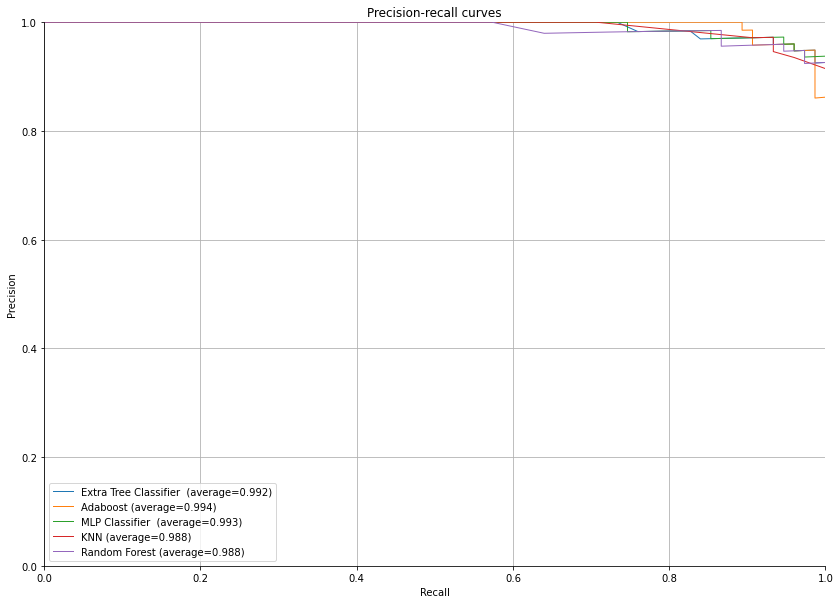

In [140]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test2,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test2, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))


precision_recall_plot(y_test2,et_100_2.predict_proba(X_test2),label='Extra Tree Classifier ',l='-')
precision_recall_plot(y_test2,ada2.predict_proba(X_test2),label='Adaboost',l='-')
precision_recall_plot(y_test2,mlp2.predict_proba(X_test2),label='MLP Classifier ',l='-')
precision_recall_plot(y_test2,knn2.predict_proba(X_test2),label='KNN',l='-')
precision_recall_plot(y_test2,rf_ent2.predict_proba(X_test2),label='Random Forest',l='-')

ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

# Feature Importance

<AxesSubplot:>

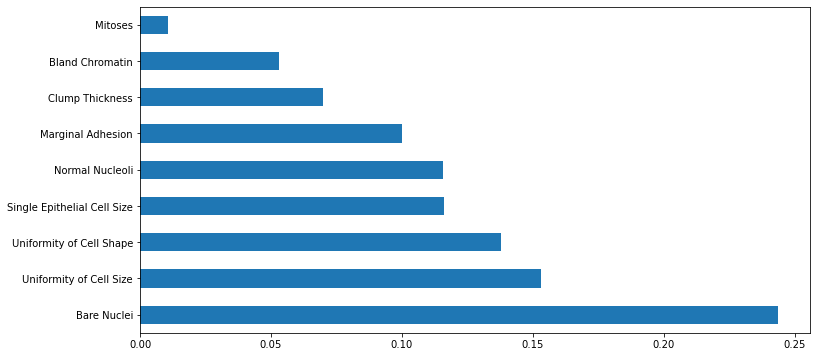

In [141]:
feat_importances2 = pd.Series(et_100_2.feature_importances_, index=X_train2.columns)
feat_importances2.nlargest(20).plot(kind='barh',figsize=(12,6))

<AxesSubplot:>

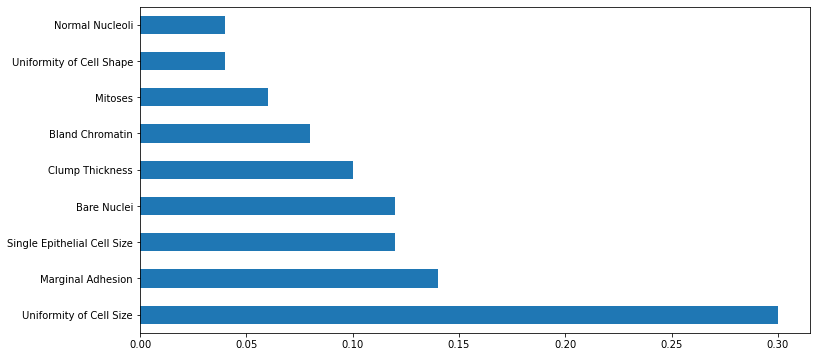

In [142]:
feat_importances2 = pd.Series(ada2.feature_importances_, index=X_train2.columns)
feat_importances2.nlargest(20).plot(kind='barh',figsize=(12,6))

# Conclusion:
    
    
As we have seen, stacked ensemble of power machine learning algorithms resulted in higher performance than any individual machine learning model.

The most contributing features for both models are:
Both models identified 'Uniformity of cell' and 'Single Epithelial cell Size' as very important features
'Bare Nuclei' was also a very important feature even those 'Adaboost' recognised it as 4th important whereas 'Extre Tree' found it as most impost feature.

'Uniformity of Cell Shape' and 'Marginal Ahension' was regarded as quite very important by 'Extra Tree' and 'Adaboost' repectively.